# Fixed Broadband Coverage Analysis - UK - 2019 - 2023

## Part 3 - Data Analysis and Visualisations

### Table of Contents:

1. [Imports and connections](#1.-imports-and-connections)
2. [Data Loading and brief exploration](#2.-data-loading-and-brief-exploration)
3. [Discussion](#3.-discussion)
4. [Trends in Broadband Coverage Over Period of Time (2019 - 2023)](#4.-trends-in-broadband-coverage-over-period-of-time-2019---2023)
5. [Observations](#5.-observations)
6. [Regional Growth Patterns](#6.-regional-growth-patterns)
7. [High-speed broadband access](#7.-high-speed-broadband-access)
8. [Distribution of broadband speeds ](#8.-distribution-of-broadband-speeds)
9. [Regional Disparities](#9.-regional-disparities)
10. [Key Observations](#10.-key-observations)
11. [Trend Analysis in Under-Served Areas](#11.-trend-analysis-in-under-served-areas)
12. [City of Kingston upon Hull versus Isles of Scilly](#12.-city-of-kingston-upon-hull-versus-isles-of-scilly)
13. [Analysis of Download Speed Categories](#13.-analysis-of-download-speed-categories)
14. [Regional Variations Analysis](#14.-regional-variations-analysis)
15. [Correlation in broadband type availability](#15.-correlation-in-broadband-type-availability)
16. [Folium maps - SFBB, UFBB, Gigabit, Full Fibre](#16.-folium-maps---sfbb-ufbb-gigabit-full-fibre)

### 1. Imports and connections

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import chardet
import glob
import re

import pymongo
import folium

In [2]:
MONGO_CONNECTION_STRING = f"mongodb://localhost:27017/"
print(f"MONGO_CONNECTION_STRING = {MONGO_CONNECTION_STRING}")

mongo_client=pymongo.MongoClient(MONGO_CONNECTION_STRING)

DB_NAME='fixed_broadband_coverage'
mongo_db=mongo_client[DB_NAME]
mongo_db

MONGO_CONNECTION_STRING = mongodb://localhost:27017/


Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'fixed_broadband_coverage')

So our data is still in MongoDB database. I will continue using the data from the database to perform the data analysis on it.

In [3]:
fixed_broadband_coverage_collection = mongo_db['fixedbroadband']

In [4]:
fixed_broadband_coverage_collection.count_documents({})

1870

It is evident that our data is still in the MongoDB database. I had 1870 records when I loaded the data in MongoDB in Q1 and I have 1870 now.

### 2. Data Loading and brief exploration 

I will now get the cleaned data into a dataframe. The code below is almost the same as the code in my answer to Q1, where I loaded the data in MongoDB. However, the difference in the code below is that I will write out the shape of each file to the screen so I have a record of what data I am dealing with. 

In [5]:
import pandas as pd
import glob

all_files = glob.glob("2023_J_TMA02_data_cleaned/*.csv")
li = []

for filename in all_files:
    # Extract the year from the filename
    year_str = filename[-8:-4]  # Get the last four characters of the filename
    if year_str.isdigit():  # Check if the extracted string consists of digits
        year = int(year_str)  # Convert the extracted string to an integer (the year)
    
    df = pd.read_csv(filename, index_col=None, header=0)
    # Add year field to each record
    df['year'] = year
    
    # Reorder columns with 'year' as the first column
    cols = list(df.columns)
    cols = ['year'] + [col for col in cols if col != 'year']
    df = df[cols]
        
    print(df.shape)
    li.append(df)

fixed_broadband_df = pd.concat(li, axis=0, ignore_index=True)

(374, 41)
(374, 41)
(374, 41)
(374, 41)
(374, 41)


We get 5 CSV files, each of which has 374 entries with 41 columns. That indeed matches the number of columns and rows.

In [6]:
fixed_broadband_df.shape

(1870, 41)

So, my dataframe has 1870 records and 41 columns. (41 columns because I have added the 'year' column to it'.) That is exactly as expected. 

Let's just check the records for each year to be sure.

In [7]:
fixed_broadband_df.groupby('year')['laua'].count()

year
2019    374
2020    374
2021    374
2022    374
2023    374
Name: laua, dtype: int64

I have grouped the entries by year and local authority. Those numbers should match the numbers printed for each CSV file loaded, shown above. 

That looks ok to me. It means that for each year I have 374 entries, which is correct, as there are 374 local authorities in the UK, after changes introduced in 2021. After cleaning the data I achieved a consistency throughout out datasets.

Let's have at the records.

In [8]:
fixed_broadband_df.head(5)

year       laua      laua_name  All Premises  All Matched Premises  \
0  2022  S12000033  ABERDEEN CITY      128708.0              128294.0   
1  2022  S12000034  ABERDEENSHIRE      127941.0              127265.0   
2  2022  E07000223           ADUR       29971.0               29920.0   
3  2022  E07000026      ALLERDALE       52309.0               52133.0   
4  2022  E07000032   AMBER VALLEY       62170.0               61902.0   

   SFBB availability (% premises)  UFBB (100Mbit/s) availability (% premises)  \
0                            95.8                                        79.1   
1                            84.2                                        20.6   
2                            99.1                                        91.0   
3                            92.7                                         5.4   
4                            96.1                                        49.4   

   UFBB availability (% premises)  Full Fibre availability (% premises)  \
0                            77.1                                  74.4   
1                            20.5                                  20.5   
2                            91.0                                  54.5   
3                             5.4                                   5.4   
4                            46.2                                  43.6   

   Gigabit availability (% premises)  ...  \
0                               74.4  ...   
1                               20.5  ...   
2                               90.1  ...   
3                                5.4  ...   
4                               43.7  ...   

   Number of premises with 0<2Mbit/s download speed  \
0                                              59.0   
1                                            2330.0   
2                                               2.0   
3                                             630.0   
4                                              58.0   

   Number of premises with 2<5Mbit/s download speed  \
0                                             119.0   
1                                            3450.0   
2                                               6.0   
3                                             456.0   
4                                             103.0   

   Number of premises with 5<10Mbit/s download speed  \
0                                              370.0   
1                                             4660.0   
2                                               39.0   
3                                              455.0   
4                                              126.0   

   Number of premises with 10<30Mbit/s download speed  \
0                                             4411.0    
1                                             9083.0    
2                                              186.0    
3                                             2093.0    
4                                             1855.0    

   % of premises with 30<300Mbit/s download speed  \
0                                            18.8   
1                                            63.7   
2                                             8.1   
3                                            87.3   
4                                            49.9   

   % of premises with >=300Mbit/s download speed  \
0                                           77.1   
1                                           20.5   
2                                           91.0   
3                                            5.4   
4                                           46.2   

   % of premises with 0<2Mbit/s download speed  \
0                                          0.0   
1                                          1.8   
2                                          0.0   
3                                          1.2   
4                                          0.1   

   % of premises with 2<5Mbit/s download speed  \
0                             

Looks ok to me. However, for some reason the entries start with year 2022. That would not matter for the analysis, but I would like to tidy it a little. I will sort the table by local authority and year. 

In [9]:
fixed_broadband_df= fixed_broadband_df.sort_values(by=['laua_name','year'], ascending=True)
fixed_broadband_df

year       laua      laua_name  All Premises  All Matched Premises  \
748   2019  S12000033  ABERDEEN CITY      125441.0              125311.0   
1496  2020  S12000033  ABERDEEN CITY      126176.0              125948.0   
1122  2021  S12000033  ABERDEEN CITY      127714.0              126771.0   
0     2022  S12000033  ABERDEEN CITY      128708.0              128294.0   
374   2023  S12000033  ABERDEEN CITY      129315.0              129197.0   
...    ...        ...            ...           ...                   ...   
1118  2019  E06000014           YORK       98735.0               98548.0   
1867  2020  E06000014           YORK       95949.0               95674.0   
1495  2021  E06000014           YORK       96147.0               95638.0   
373   2022  E06000014           YORK       96526.0               96317.0   
747   2023  E06000014           YORK       96725.0               96582.0   

      SFBB availability (% premises)  \
748                             93.5   
1496                            94.8   
1122                            94.7   
0                               95.8   
374                             97.2   
...                              ...   
1118                            94.0   
1867                            94.4   
1495                            94.2   
373                             94.7   
747                             95.4   

      UFBB (100Mbit/s) availability (% premises)  \
748                                         15.8   
1496                                        49.1   
1122                                        66.6   
0                                           79.1   
374                                         84.8   
...                                          ...   
1118                                        17.4   
1867                                        75.7   
1495                                        77.5   
373                                         75.8   
747                                         80.6   

      UFBB availability (% premises)  Full Fibre availability (% premises)  \
748                             20.1                                  13.1   
1496                            41.7                                  35.0   
1122                            62.1                                  58.4   
0                               77.1                                  74.4   
374                             83.9                                  83.0   
...                              ...                                   ...   
1118                            70.9                                  43.7   
1867                            72.1                                  54.9   
1495                            74.5                                  60.4   
373                             72.6                                  52.3   
747                             78.4                                  65.9   

      Gigabit availability (% premises)  ...  \
748                                13.1  ...   
1496                               35.0  ...   
1122                               58.4  ...   
0                                  74.4  ...   
374                                83.0  ...   
...                                 ...  ...   
1118                               43.7  ...   
1867                               54.9  ...   
1495                               72.0  ...   
373                                70.0  ...   
747                                76.3  ...   

      Number of premises with 0<2Mbit/s download speed  \
748                                               49.0   
1496                                              55.0   
1122                                              67.0   
0                                                 59.0   
374                                               58.0   
...                                                ...   
1118                                              36.0   
1867     

I just want to check that there are records for all local authority areas and years.

In [10]:
fixed_broadband_df['year'].unique()

array([2019, 2020, 2021, 2022, 2023])

The period of years is correct. Covering from 2019 till 2023.

In [11]:
fixed_broadband_df['laua'].nunique()

374

That is correct too, as there are 374 local authorities in the UK, as we have seen earlier. I am not going to list them all, because the list is too long and also, I know that there are no duplicates and the list of LAUA contains all unique values.

In [12]:
fixed_broadband_df['laua_name'].describe()

count     1870
unique     374
top       YORK
freq         5
Name: laua_name, dtype: object

In [13]:
fixed_broadband_df['laua'].describe()

count          1870
unique          374
top       E06000014
freq              5
Name: laua, dtype: object

This tells me that there are 1870 entries of local authority areas code and names, respectively. It is 1870 entries because there are 374 unique areas but since we have combined the data from all five CSV files, which each of them contain the local authority area code, there is some form of duplication in terms of local authority code and name. So, when we multiply 374 by 5, we get 1870. The frequency shows '5', which again is because each 'laua' code is repeated 5 times due to the combining of the data.

Let's see how the number of premises with SFBB availability is changing over the years.

NOTE: The .groupby() function in pandas by default sorts the groups in ascending order based on the keys grouped by. In my case I am grouping by three columns: 'laua_name', 'Number of premises with UFBB availability', and 'year'.

So, when I call .groupby() and then .count(), it counts the occurrences of each unique combination of these three columns. The sorting I am seeing is that when grouped by these columns, the combinations with smaller values for 'Number of premises with SFBB availability' appear earlier in the resulting DataFrame. That resulted in records showing by ascending number of premises, while I wanted to sort them by ascending year (i.e. from 2019 to 2023 in order). 

I looked in Panda's documentation of how to ammend that. To change the sorting behavior, I can use the sort parameter of the groupby() function. Setting sort=False will prevent the automatic sorting. 

Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html

In [14]:
fixed_broadband_df.groupby(['laua_name', 
                            'Number of premises with SFBB availability', 
                            'year'], sort=False)['year'].count()

laua_name      Number of premises with SFBB availability  year
ABERDEEN CITY  117152.0                                   2019    1
               119358.0                                   2020    1
               120938.0                                   2021    1
               123335.0                                   2022    1
               125636.0                                   2023    1
                                                                 ..
YORK           92626.0                                    2019    1
               90313.0                                    2020    1
               90609.0                                    2021    1
               91448.0                                    2022    1
               92312.0                                    2023    1
Name: year, Length: 1870, dtype: int64

This is interesting. I see an increase for Aberdeen City that is 8484 (125 636 - 117 152 = 8484) and for York we see a decrease of 314 (92 312 - 92 626 = -314). The respective increases and decreases are in terms of number of premises with SFBB availability. I will note that down for future reference in the analysis. 

In [15]:
fixed_broadband_df.groupby(['laua_name', 
                            'Number of premises with UFBB availability', 
                            'year'], sort=False)['year'].count()

laua_name      Number of premises with UFBB availability  year
ABERDEEN CITY  25163.0                                    2019    1
               52461.0                                    2020    1
               79372.0                                    2021    1
               99197.0                                    2022    1
               108514.0                                   2023    1
                                                                 ..
YORK           69871.0                                    2019    1
               68952.0                                    2020    1
               71630.0                                    2021    1
               70059.0                                    2022    1
               75825.0                                    2023    1
Name: year, Length: 1870, dtype: int64

Here, for UFBB availability, we see increase in both areas. For Aberdeen City the increase is 83,351 (108 514 - 25 163 = 83 351) in terms of number of properties over the period of 5 years, while for York the increase is a lot less 5954 (75 825 - 69 871 = 5954). 

In [16]:
fixed_broadband_df.groupby(['laua_name', 
                            'Number of premises with Full Fibre availability', 
                            'year'], sort=False)['year'].count()

laua_name      Number of premises with Full Fibre availability  year
ABERDEEN CITY  16410.0                                          2019    1
               44051.0                                          2020    1
               74618.0                                          2021    1
               95719.0                                          2022    1
               107315.0                                         2023    1
                                                                       ..
YORK           43077.0                                          2019    1
               52549.0                                          2020    1
               58026.0                                          2021    1
               50466.0                                          2022    1
               63736.0                                          2023    1
Name: year, Length: 1870, dtype: int64

We see some big increases for both areas in terms of the Full Fibre availability in premises. For Aberdeen City that is 90 905 (107 315 - 16 410 = 90 905) and for York area that is 20 659 (63 736 - 43 077 = 20 659) over a period of 5 years.

There are some big jumps in number of premises with various broadband speeds, especially for UFBB and Full Fibre availability. The difference is more obvious in the Aberdeen City, where the number of available premises with full fibre availability has gone nearly 6.5 times over the 5 year period from 16 410 to 107 315 (107315 / 16410 = 6.539609993906155 or 6.5 when rounded). For York, that increase is significantly less. Based on rough calculations that is 1.47% increase over the 5 years (63 736 / 43 077 = 1.49). That seems like a massive jump. Let's see if the number of matched properties have increased too. As new property developments are happening all the time across UK, I would expect to see some increase in the number of matched properties too.

In [17]:
fixed_broadband_df.groupby(['laua_name', 
                            'All Matched Premises', 
                            'Number of premises with Full Fibre availability', 
                            'year'], sort=False)['year'].count()

laua_name      All Matched Premises  Number of premises with Full Fibre availability  year
ABERDEEN CITY  125311.0              16410.0                                          2019    1
               125948.0              44051.0                                          2020    1
               126771.0              74618.0                                          2021    1
               128294.0              95719.0                                          2022    1
               129197.0              107315.0                                         2023    1
                                                                                             ..
YORK           98548.0               43077.0                                          2019    1
               95674.0               52549.0                                          2020    1
               95638.0               58026.0                                          2021    1
               96317.0               50466.0 

That is an increase of 3886 premises (129 197 - 125 311 = 3886 for Aberdeen in the period 2019-2023). So, clearly the number of matched premises has not increased 6.5 times as the number of premises with full fibre availability. So, we can probably conclude that there is no strong relation between these two variables. However, that is just for Aberdeen. 

For York, we actually see a decrease in matched properties, 1966 (96 582 - 98548) properties less in five years. I wonder why that is... I would perform the same checks but will include the number of all premises in the area, as perhaps the number of premises in the area remained pretty much the same, but less properties have been matched over the years. Let's see.

In [18]:
fixed_broadband_df.groupby(['laua_name',
                            'All Premises',
                            'All Matched Premises', 
                            'Number of premises with Full Fibre availability', 
                            'year'], sort=False)['year'].count()

laua_name      All Premises  All Matched Premises  Number of premises with Full Fibre availability  year
ABERDEEN CITY  125441.0      125311.0              16410.0                                          2019    1
               126176.0      125948.0              44051.0                                          2020    1
               127714.0      126771.0              74618.0                                          2021    1
               128708.0      128294.0              95719.0                                          2022    1
               129315.0      129197.0              107315.0                                         2023    1
                                                                                                           ..
YORK           98735.0       98548.0               43077.0                                          2019    1
               95949.0       95674.0               52549.0                                          2020    1
               

There is certainly 2010 premises less in the area of York over the last five years. Perhaps, that could be because houses have been knocked down and block of flats being built in these placed. In other words, there might have been 2000 or so houses being demolished and new developments built. This is just a suggestion and not a conclusion. And the focus of this project is on the broadband, not premises, so I will move on.

As a consequence of my previous brief discoveries, a logical question would be if in Aberdeen City the Full Fibre availabiliy has increased 6.5 times over the period of 5 years, I wonder if the premises with broadband speed below USO (Universal Service Obligation) has decreased by that much. Let's briefly see.

In [19]:
fixed_broadband_df.groupby(['laua_name', 
                            'Number of premises below the USO', 
                            'year'], sort=False)['year'].count()

laua_name      Number of premises below the USO  year
ABERDEEN CITY  189.0                             2019    1
               300.0                             2020    1
               93.0                              2021    1
               55.0                              2022    1
               40.0                              2023    1
                                                        ..
YORK           191.0                             2019    1
               296.0                             2020    1
               32.0                              2021    1
               23.0                              2022    1
               16.0                              2023    1
Name: year, Length: 1870, dtype: int64

This is interesting. For Aberdeen we see that the Number of premises below the USO has decreased by nearly 5 times (189 / 40 = 4.725), which is close to the increase factor of increasing the number of premises with full fibre availability. However, it is worth noting that in 2020 the number of premises below the USO jumped significantly - from 189 to 300 for Aberdeen and 191 to 296 for York. I will note that down. Perhaps, some legislation had changed then.

In fact, after checking the Connected Nations' report I noted that the Universal Service Obligation (USO) was launched in March 2020. Prior to the formal launch of the USO, Ofcom and other stakeholders would have still been monitoring and reporting on broadband coverage and speeds, including the number of premises with access to various broadband speed thresholds. When reporting figures for 2019 or earlier years, Ofcom might have used criteria that anticipated the USO standards to highlight areas of insufficient broadband coverage. Hence why, the values recorded in 2019 might be slightly inaccurate.

But nevertheless, even if we are looking at the values from year 2020 onwards, we see a decrease in number of premises below USO, which is good news.

It is quite difficult to draw any conclusions simply by looking at figures and values. Let's look at the various types of broadband - SPFF, UFBB and Full Fibre in each area.

We have got both the number of premises and percentages data available from the period of 2019 to 2023. For the purpose of this task I will be using the percentage values. The percentage values are calculated against the number of matched premises in each area, so it gives a more realistic picture and it is easier to compare, rather than comparing numbers. Percentages standardise the comparison across regions of different sizes, making it easier to assess and compare the relative availability of broadband services. Also, percentage figures can quickly convey the proportion of the population with access to various broadband speeds, simplifying the communication of coverage levels. Percentages emphasies the accessibility of services to the population rather than the absolute scale, highlighting equity.

However, it all depends on whether the analysis aims to compare broadband availability across regions of variying sizes to communicate accesssibility and coverage goals broadly, then percentages are more suitable. If the focus is on detailed planning for infrastructure development, addressing specific gaps, or evaluating the scale of interventions required, number of premises offer the necessary operational detail. 

I will call the name of the columns in the dataset, so I can copy and paste some of the names in order to generate various queries.

In [20]:
fixed_broadband_df.columns

Index(['year', 'laua', 'laua_name', 'All Premises', 'All Matched Premises',
       'SFBB availability (% premises)',
       'UFBB (100Mbit/s) availability (% premises)',
       'UFBB availability (% premises)',
       'Full Fibre availability (% premises)',
       'Gigabit availability (% premises)',
       '% of premises unable to receive 2Mbit/s',
       '% of premises unable to receive 5Mbit/s',
       '% of premises unable to receive 10Mbit/s',
       '% of premises unable to receive 30Mbit/s',
       '% of premises below the USO', '% of premises with NGA',
       '% of premises able to receive decent broadband from FWA',
       'Number of premises with SFBB availability',
       'Number of premises with UFBB (100Mbit/s) availability',
       'Number of premises with UFBB availability',
       'Number of premises with Full Fibre availability',
       'Number of premises with Gigabit availability',
       'Number of premises unable to receive 2Mbit/s',
       'Number of premises una

### 3. Discussion

Given the variation of data in the dataset, there are various topics and areas that can be explored. I feel the first and natural step is to observe the trends over time. For example to see how the broadband availability evolved from 2019 to 2023 across the UK. 

Since we also have data for all local authorities in the UK, I think it is worth exploring the geographic disparities. For example, are there significant disparities in broadband coverage between different local authority areas? Which areas are most and least served?

That leads us to the topic of digital divide. Perhaps, exploring and identifying areas with low broadband coverage could highlight aspects of the digital divide.

### 4. Trends in Broadband Coverage Over Period of Time (2019 - 2023)

I will analyse how the availability of different types of broadband (SFBB, UFBB, UFBB(100Mbit/s+) Full Fibre, Gigabit) has changed over the years. This will help us understand the progress in broadband deployment over time. Also, it can shed light on the effectiveness of digital infrastructure policies and investments. 

Plotting these trends will visually demonstrate how the availability of different types of broadband has changed over time.

I will start with the evolution of broadband availability analysis. This involves calculating the yearly average availability of SFBB, UFBB, UFBB (100 Mbit/s), Full Fibre, and Gigabit-capable connections across the UK. 

In [21]:
# Grouping the data by year and calculating the mean availability for each type of broadband
yearly_trends = fixed_broadband_df.groupby('year').agg({
    'SFBB availability (% premises)': 'mean',
    'UFBB availability (% premises)': 'mean',
    'UFBB (100Mbit/s) availability (% premises)': 'mean',
    'Full Fibre availability (% premises)': 'mean',
    'Gigabit availability (% premises)': 'mean'
}).reset_index()

In [22]:
yearly_trends.rename(columns={
    'SFBB availability (% premises)': 'Average % of premises with SFBB Availability',
    'UFBB availability (% premises)': 'Average % of premises with UFBB Availability',
    'UFBB (100Mbit/s) availability (% premises)': 'Average % of premises with UFBB (100Mbit/s +) availability',
    'Full Fibre availability (% premises)': 'Average % of premises with Full Fibre Availability',
    'Gigabit availability (% premises)': 'Average % of premises with Gigabit Availability'
}, inplace=True)
yearly_trends

year  Average % of premises with SFBB Availability  \
0  2019                                     93.618984   
1  2020                                     94.485561   
2  2021                                     94.344652   
3  2022                                     95.325668   
4  2023                                     96.072995   

   Average % of premises with UFBB Availability  \
0                                     47.039305   
1                                     52.414439   
2                                     57.726203   
3                                     66.110428   
4                                     70.550802   

   Average % of premises with UFBB (100Mbit/s +) availability  \
0                                          15.550267            
1                                          54.866310            
2                                          59.760963            
3                                          67.605615            
4                                          71.809091            

   Average % of premises with Full Fibre Availability  \
0                                           8.591444    
1                                          14.959893    
2                                          23.960963    
3                                          38.207754    
4                                          47.627807    

   Average % of premises with Gigabit Availability  
0                                         8.591444  
1                                        21.731818  
2                                        38.224599  
3                                        64.590642  
4                                        69.724866

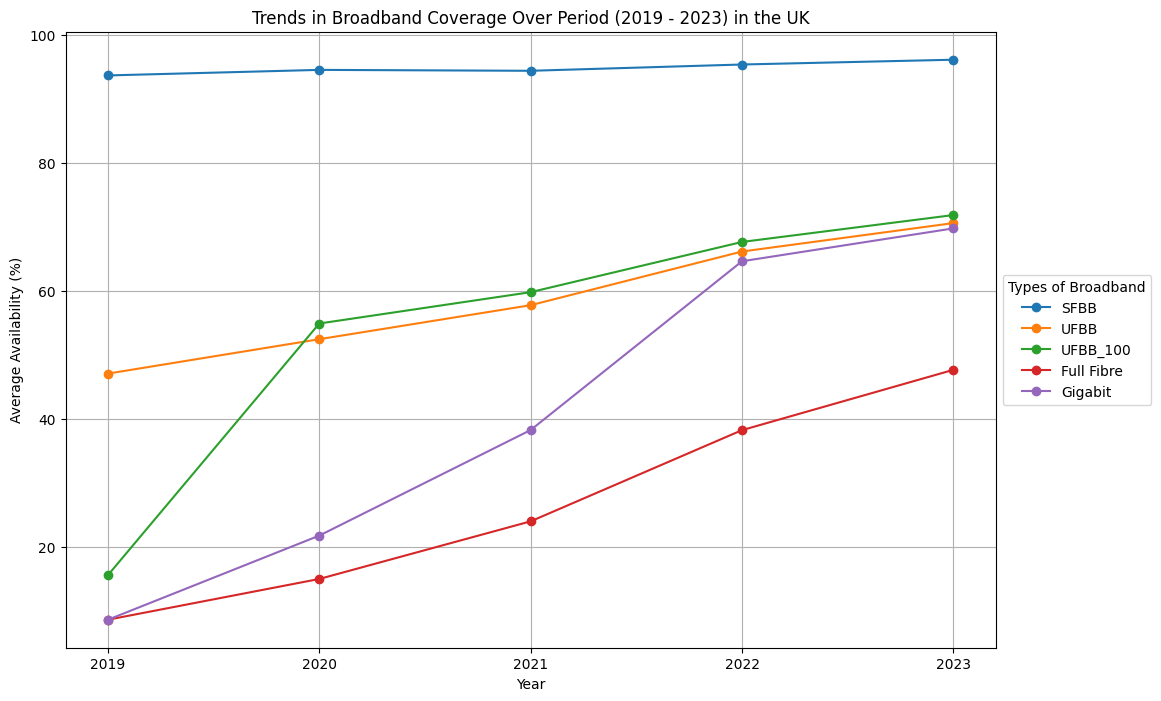

In [23]:
# Plotting the trends
plt.figure(figsize=(12, 8))
plt.plot(yearly_trends['year'], yearly_trends['Average % of premises with SFBB Availability'], label='SFBB', marker='o')
plt.plot(yearly_trends['year'], yearly_trends['Average % of premises with UFBB Availability'], label='UFBB', marker='o')
plt.plot(yearly_trends['year'], yearly_trends['Average % of premises with UFBB (100Mbit/s +) availability'], label='UFBB_100', marker='o')
plt.plot(yearly_trends['year'], yearly_trends['Average % of premises with Full Fibre Availability'], label='Full Fibre', marker='o')
plt.plot(yearly_trends['year'], yearly_trends['Average % of premises with Gigabit Availability'], label='Gigabit', marker='o')

plt.title('Trends in Broadband Coverage Over Period (2019 - 2023) in the UK')
plt.xlabel('Year')
plt.ylabel('Average Availability (%)')
plt.legend(loc='center left', title='Types of Broadband', bbox_to_anchor=(1.0, 0.5))
plt.grid(True)
plt.xticks(yearly_trends['year'])
plt.show()


### 5. Observations

The chart above visualizes the evolution of broadband availability over the 5 year period from 2019 to 2023 in the UK, focusing on five key types of broadband - Superfast Broadband (SFBB), general Ultrafast Broadband (UFBB), UFBB (100 Mbit/s+), Full Fibre and Gigabit broadband.

From the visualisation, I observe patterns such as which types of broadband have seen growth, which have remained stable, and how quickly new technologies like Full Fibre and Gigabit broadband are being adopted. These trends can provide insights into the effectiveness of digital infrastructure policies, investments, and the evolving landscape of broadband technology. 

Overall, the Superfast Broadband (SFBB) availability remains relatively high throughout the period, indicating a mature level of coverage across the country.

Ultrafast Broadband and Full Fibre availability show a notable upward trend, reflecting ongoing investments and advancements in broadband infrastructure. 

Gigabit-capable connection availability also demonstrates significant growth, particularly in the latter years, highlighting the push towards faster and more reliable internet services.

#### 5.1 SFBB availability

We see that nearly all matched premises in the UK have Superfast Broadband. Meaning that 93.62% of premises in 2019 had 30Mbit/s or faster download speed from their fixed broadband. That number increased to 96.07% in 2023. So, there was a 2.46% increase over 5 years, or nearly 0.5% increase per year. That seems to be the broadband type with least progress. Although, this gradual growth reflects ongoing improvements in broadband infrastructure to support speeds above 30Mbit/s.

#### 5.2 UFBB availability

The Ultrafast Broadband, covering download speeds from 300Mbit/s and greater, is showing an increase from 47% in 2019 to 70% in 2023. That is an increase of 23% in availability across 5 years, or about 4.6% increase per year on average. The increase seems to be steady over the years. However, the largest increase seems to be between 2021 and 2022 with 8.4% increase. 

#### 5.3 UFBB availability (100Mbit/s +)

Ultrafast Broadband (UFBB, 100Mbit/s) availability has shown significant growth, jumping from 15.55% in 2019 to 71.81% in 2023. This substantial increase indicates a rapid deployment of infrastructure capable of delivering higher internet speeds. However, it is worth noting that data for UFBB with 100Mbit/s download speed was not present in 2019 and it was estimated. Perhaps, the large jump from 2019 to 2020 is not a precise and truthful representation of the reality. Especially when we are seeing the trends for the years onwards from 2020 to 2023.

If we ignore the values for 2019 for a moment and we only focus on the values existing for the period 2020-2023, we will see the increasing trend is not that large. I calculated the average increase is about 5.6% a year. Here is a demonstration:

The increase from 2020 to 2021 is calculated as: 59.760963 - 54.866310 = 4.894653 (4.89 when rounded).

The increase from 2021 to 2022 is calculated as: 67.605615 - 59.760963 = 7.844652 (7.84 when rounded).

The increase from 2022 to 2023 is calculated as: 71.809091 - 67.605615 = 4.203476 (4.20 when rounded).

So, the average increase is (4.89 + 7.84 + 4.20)/3 = 5.6%

Knowing the increase over the years, the percentage of UFBB (100Mbit/s +) availability in 2019 was probably about 49-50%, based on the increase over the future years. The UFBB (100Mbit/s +) availability was 54.8. Knowing that the average increase is about 5.6%, I think we can approximate that the percentage of availability was around 49.2 (54.8 - 5.6 = 49.2). 


#### 5.4 Gigabit availability

Moving on to the Gigabit availability. That seems to have shown most increase out of all types of broadband, starting at about 8.5% availability in 2019 and increase to nearly 70% in 2023. That is a staggering increase of nearly 62% over 5 years. That is an average of 12.4% increase per year. Similarly to the other types of broadbands, the most increase seemed to have happened between 2021 and 2022, giving 26.37% increase in one year. 

It is worth noting that Gigabit data was not available in the 2019 dataset and such values were populated from the values for Full Fibre availability, as explained in the Connected Nations 2020 report that Gigabit-capable coverage includes all coverage from full fibre networks.

#### 5.5 Full Fibre availability

The Full Fibre availability also seems to have increased significantly over the period 2019-2023. It had 8.59% availability in 2019 and increased to 47.6% in 2023. That is a 39% increase over a period of 5 years, making it an average increase per year of 7.8%. Once again, we observe the same pattern of significant increase, just like on the other types of broadbands, of 15.2% between 2021 and 2022 for Full Fibre.

Also, it seems that Full Fibre and Gigabit availability started the more significant increase not only between 2021 and 2022 but from 2020 to 2021. But between 2021 and 2022 it was significantly more.

For Full Fibre the increase from 2020 to 2021 was 9%, while the increase for the same time period for Gigabit availability was 16.49%.

Full Fibre connections provide some of the fastest internet speeds available, and their increasing availability suggests a strong move towards more reliable and faster internet services.

Seeing from the graph above, the parallel increase in Gigabit and Full Fibre availability points towards a growing capacity for ultra-high-speed internet access across the UK.

#### 5.5 Conclusion

These trends highlight a significant improvement in the UK's broadband infrastructure, with a clear shift towards higher speed tiers. The data suggests a concerted effort to upgrade network capabilities, likely driven by policy initiatives and investments in broadband technologies.

There is a clear pattern of increase in broadband speeds especially for the period from 2020 to 2022 with focus on Full Fibre and Gigabit availability. The period of 2020-2022 was a period of global pandemic and lockdowns not only in the UK but globally. At that time schools were closed and children were forced to study remotely, relying heavily on broadband availability, as well as having the necessary hardware and equipment. 

The lockdowns and pandemic had a similar affect on adults too. People having jobs that could be performed from home were also advised to work from home, where possible. That forced even more people relying on stable broadband.

Additionally, as a result of the lockdowns, there was less traffic on the roads, which helped and perhaps accelerated the process of laying fibre optic cables.

### 6. Regional Growth Patterns

With the increasing importance of high-speed internet for remote work and education, particularly highlighted by the COVID-19 pandemic, examining areas with high availability of UFBB and Gigabit broadband could shed light on regions better equipped for the future work and learning.

My next step would be to identify which areas are leading in adopting advanced broadband technologies and which areas are lagging, providing more nuanced understanding of digital infrastructure development across different parts of the country.

To explore coverage gaps, I will focus on identifying areas that are significantly underserved, particularly those unable to receive broadband speed of at least 10Mbit/s, which technically are categories as 'Premises below USO'. This threshold is often considered the minimum for basic online activities and services. I will analyse the percentage of premises in each area unable to receive these speeds and highlight areas with the highest percentages. This will give us insight into which areas are most in need of broadband infrastructure improvements.

Additionally, I will examine the trend in the percentage of premises unable to receive 2Mbit/s and 5Mbit/s, as these metrics further indicate very low broadband availability, which can be critical for the most basic digital inclusion efforts.

Let's proceed with identifying these coverage gaps. I will compile a list of the top areas with largest coverage gaps for broadband speeds below 10Mbit/s, along with an analysis of trends for premises unable to receive 2Mbit/s and 5Mbit/s over the 5 year period. 

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
# Filter data for the latest year (2023) to identify current coverage gaps
latest_year = 2023
latest_data_df = fixed_broadband_df[fixed_broadband_df['year'] == latest_year]
latest_data_df

year       laua      laua_name  All Premises  All Matched Premises  \
374  2023  S12000033  ABERDEEN CITY      129315.0              129197.0   
375  2023  S12000034  ABERDEENSHIRE      128408.0              128070.0   
376  2023  E07000223           ADUR       29985.0               29953.0   
377  2023  E07000026      ALLERDALE       52482.0               52364.0   
378  2023  E07000032   AMBER VALLEY       62512.0               62430.0   
..    ...        ...            ...           ...                   ...   
743  2023  W06000006        WREXHAM       66829.0               66176.0   
744  2023  E07000238       WYCHAVON       64378.0               64205.0   
745  2023  E07000128           WYRE       58322.0               58243.0   
746  2023  E07000239    WYRE FOREST       49121.0               49027.0   
747  2023  E06000014           YORK       96725.0               96582.0   

     SFBB availability (% premises)  \
374                            97.2   
375                            85.9   
376                            99.1   
377                            93.1   
378                            97.2   
..                              ...   
743                            96.0   
744                            96.2   
745                            97.3   
746                            97.8   
747                            95.4   

     UFBB (100Mbit/s) availability (% premises)  \
374                                        84.8   
375                                        25.5   
376                                        92.8   
377                                         6.0   
378                                        62.4   
..                                          ...   
743                                        56.2   
744                                        52.4   
745                                        60.8   
746                                        63.8   
747                                        80.6   

     UFBB availability (% premises)  Full Fibre availability (% premises)  \
374                            83.9                                  83.0   
375                            25.5                                  25.4   
376                            92.8                                  65.4   
377                             6.0                                   6.0   
378                            60.6                                  59.0   
..                              ...                                   ...   
743                            55.7                                  55.2   
744                            49.5                                  48.4   
745                            60.8                                  60.8   
746                            63.8                                  25.7   
747                            78.4                                  65.9   

     Gigabit availability (% premises)  ...  \
374                               83.0  ...   
375                               25.4  ...   
376                               92.8  ...   
377                                6.0  ...   
378                               59.1  ...   
..                                 ...  ...   
743                               55.2  ...   
744                               49.4  ...   
745                               60.8  ...   
746                               63.8  ...   
747                               76.3  ...   

     Number of premises with 0<2Mbit/s download speed  \
374                                              58.0   
375                                            2214.0   
376                                               0.0   
377                                             617.0   
378                                              42.0   
..                                                ...   
743                                             132.0   
744                                              53.0   
745                

In [26]:
# Sort areas by the percentage of premises unable to receive 10Mbit/s in 2023.
coverage_gaps_10mbps = latest_data_df[['laua_name', 
                                       '% of premises unable to receive 10Mbit/s']].sort_values(by='% of premises unable to receive 10Mbit/s', ascending=False)

In [27]:
# Analyzing trends for premises unable to receive 2Mbit/s and 5Mbit/s over the years
trend_data_low_speeds = fixed_broadband_df.groupby('year')[['% of premises unable to receive 2Mbit/s', '% of premises unable to receive 5Mbit/s', '% of premises unable to receive 10Mbit/s']].mean()
trend_data_low_speeds

% of premises unable to receive 2Mbit/s  \
year                                            
2019                                 0.416578   
2020                                 0.395187   
2021                                 0.365775   
2022                                 0.291979   
2023                                 0.274064   

      % of premises unable to receive 5Mbit/s  \
year                                            
2019                                 1.106417   
2020                                 0.997326   
2021                                 0.913102   
2022                                 0.736631   
2023                                 0.679412   

      % of premises unable to receive 10Mbit/s  
year                                            
2019                                  2.100802  
2020                                  1.856952  
2021                                  1.681551  
2022                                  1.362299  
2023                                  1.239305

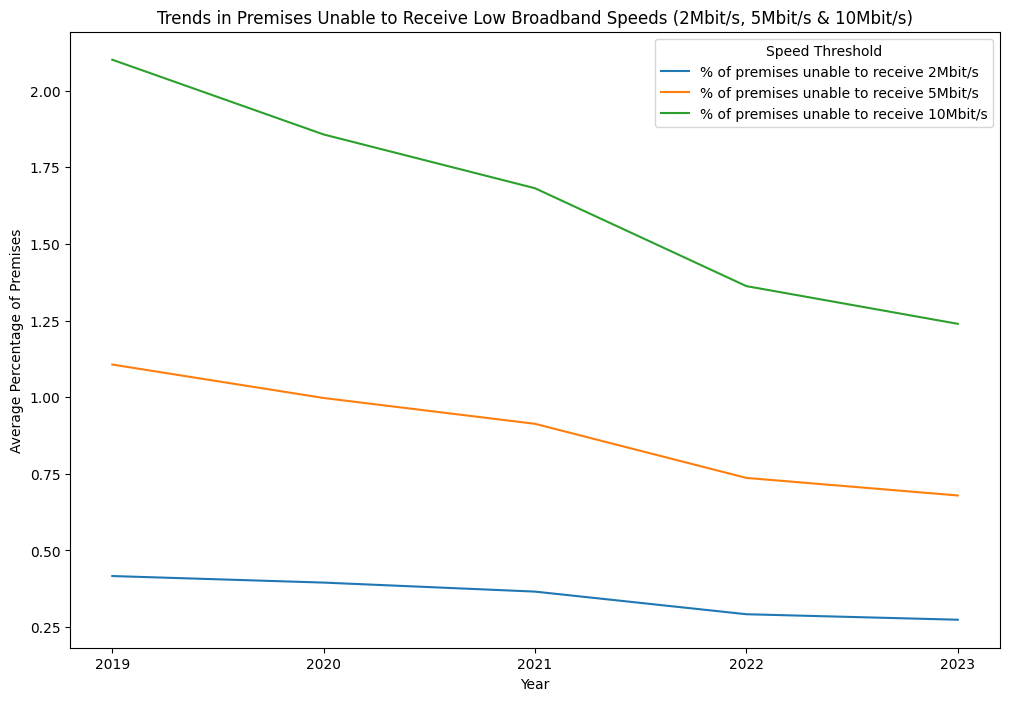

In [28]:
# Plotting the trend
plt.figure(figsize=(12, 8))

for column in trend_data_low_speeds.columns:
    sns.lineplot(data=trend_data_low_speeds, x=trend_data_low_speeds.index, y=column, label=column)

plt.title('Trends in Premises Unable to Receive Low Broadband Speeds (2Mbit/s, 5Mbit/s & 10Mbit/s)')
plt.xlabel('Year')
plt.ylabel('Average Percentage of Premises')
plt.legend(title='Speed Threshold')
plt.xticks(trend_data_low_speeds.index)

plt.show()

The trend analysis for premises unable to receive low broadband speeds indicates a decrease over the years, suggesting improvements in broadband infrastructure to cover areas previously lacking even the most basic broadband services. This trend is positive, reflecting efforts to enhance digital inclusion by reducing the number of premises without access to fundamental broadband speeds. The gap seems to have more significant reduction around year 2022.

However, when focusing on the current coverage gaps for broadband speeds below 10Mbit/s, I identified areas where significant portions of the populations are underserved. As of year 2023, the top areas with the largest coverage gaps are shown below:

In [29]:
coverage_gaps_10mbps

laua_name  % of premises unable to receive 10Mbit/s
611               ORKNEY ISLANDS                                      16.7
651             SHETLAND ISLANDS                                      16.0
724                   WEST DEVON                                       9.9
706                     TORRIDGE                                       9.1
619                        POWYS                                       8.5
..                           ...                                       ...
550                      LAMBETH                                       0.0
543                    ISLINGTON                                       0.0
546  KINGSTON UPON HULL, CITY OF                                       0.0
402                    BLACKPOOL                                       0.0
428                       CAMDEN                                       0.0

[374 rows x 2 columns]

These areas, particularly the Orkney and Shetland Islands, show a significant need for broadband infrastructure improvements to enable residents to access basic digital services. The relatively high percentages indicate that a notable portion of the population in these areas may struggle with online activities that many take for granted, such as online banking, telecommuting, digital government services, etc.

In [30]:
pivot_coverage_gaps_10mbps = coverage_gaps_10mbps.pivot_table(values='% of premises unable to receive 10Mbit/s', index='laua_name', aggfunc="mean")
# Sort areas by the percentage of premises unable to receive 10Mbit/s
pivot_coverage_gaps_10mbps = latest_data_df[['laua_name', '% of premises unable to receive 10Mbit/s']].sort_values(by='% of premises unable to receive 10Mbit/s', ascending=False).head(10)                                                         
pivot_coverage_gaps_10mbps

laua_name  % of premises unable to receive 10Mbit/s
611    ORKNEY ISLANDS                                      16.7
651  SHETLAND ISLANDS                                      16.0
724        WEST DEVON                                       9.9
706          TORRIDGE                                       9.1
619             POWYS                                       8.5
382   ARGYLL AND BUTE                                       8.4
488              EDEN                                       7.9
375     ABERDEENSHIRE                                       7.6
572         MID DEVON                                       7.2
531          HIGHLAND                                       7.1

Text(0.5, 1.0, 'Top 10 Areas in the UK below the USO for 2023')

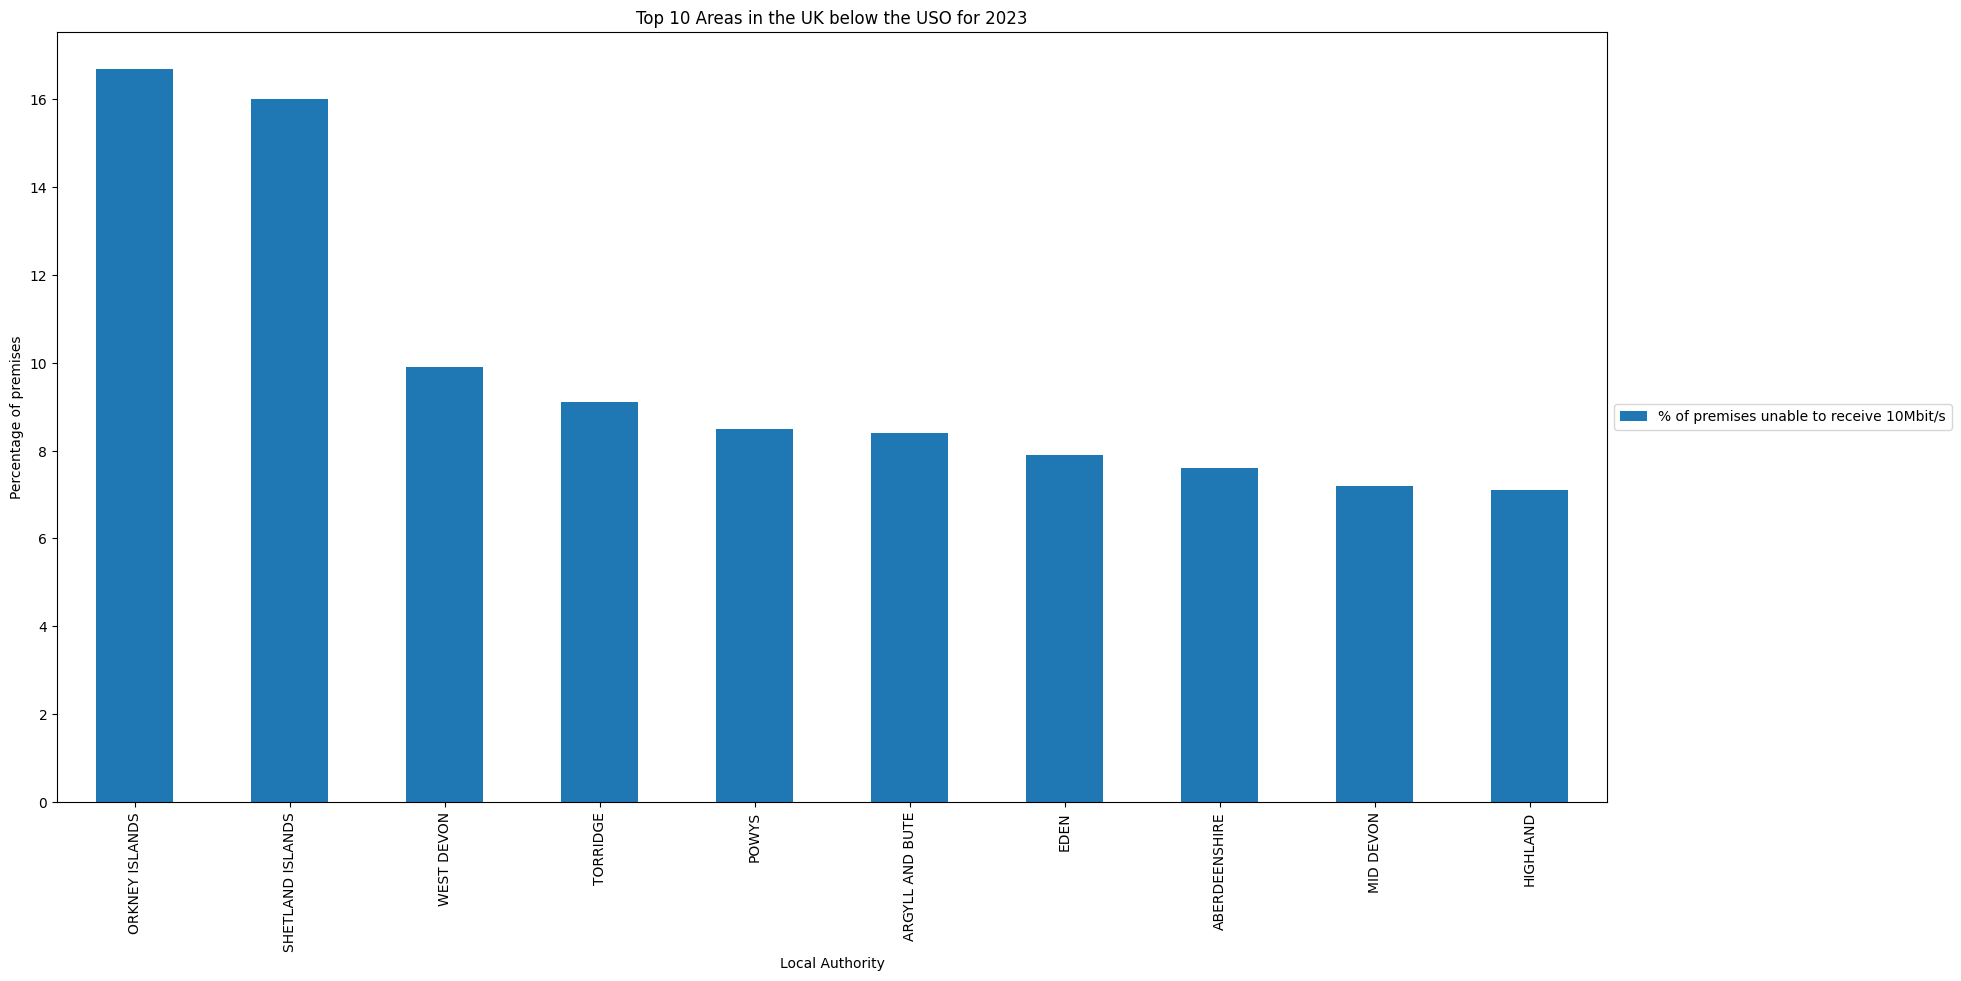

In [31]:
# Plotting the bar chart with specified column names
ax = pivot_coverage_gaps_10mbps.plot.bar(x='laua_name', stacked=True, figsize=(20, 10))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_xlabel('Local Authority')
ax.set_ylabel('Percentage of premises')
ax.set_title('Top 10 Areas in the UK below the USO for 2023')

It is clear from the graph that Orkney Islands and Shetland Islands are the two areas with highest percentage of premises that are unable to receive broadband speeds under 10Mbit/s download speed and 1Mbit/s upload speed.

Both areas are located in Scotland and as we can conclude from the name, they are islands. Their geographical location as an island community likely presents unique challenges for broadband infrastructure development, such as higher costs and logistical difficulties. 

I would also like to see what broadband availability is there for the top 10 areas in the UK with the highest percentage of premises unable to receive 10Mbit/s.

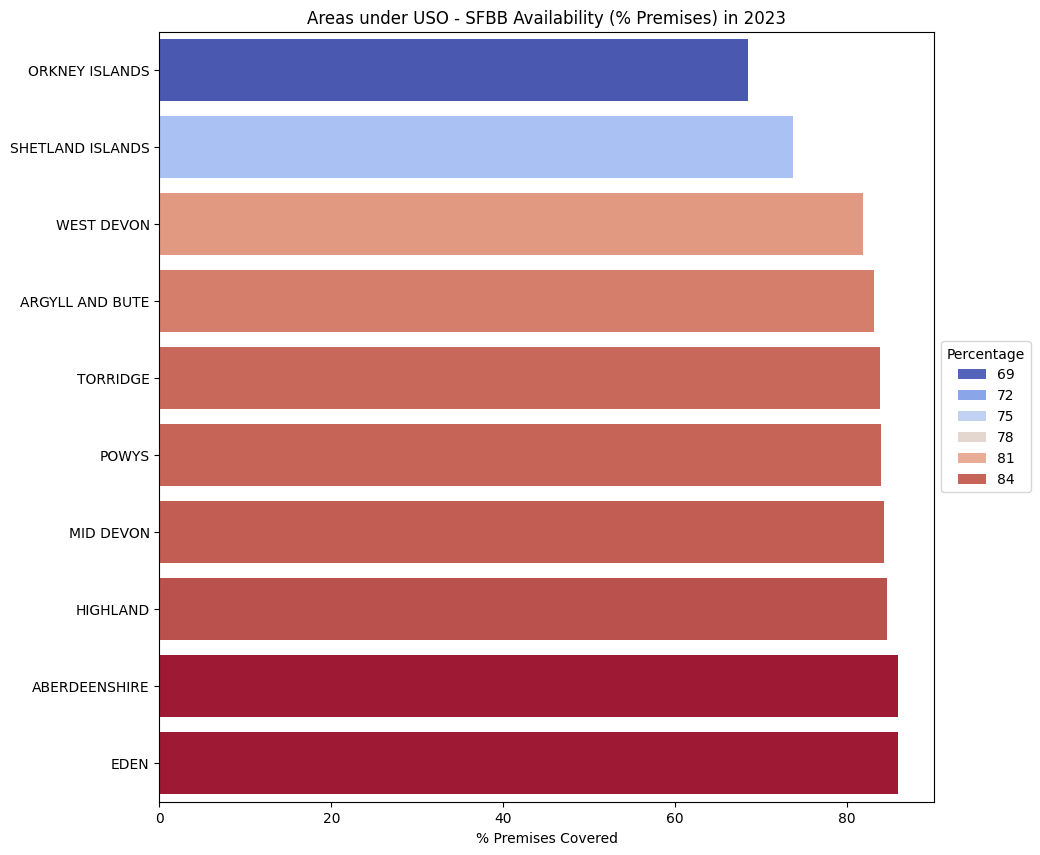

In [32]:
# Identifying the top 10 areas for 2023 with the highest percentage of premises unable to receive 10Mbit/s
top_10_unable_10mbit_2023 = latest_data_df.nlargest(10, '% of premises unable to receive 10Mbit/s')

# Sorting data for each broadband type in ascending order for visualization
sfbb_sorted = top_10_unable_10mbit_2023.sort_values('SFBB availability (% premises)')

# Plotting the broadband availability metrics for these areas
plt.figure(figsize=(10, 10))

# SFBB Availability
sns.barplot(y='laua_name', x='SFBB availability (% premises)', hue='SFBB availability (% premises)', data=sfbb_sorted, palette='coolwarm', dodge=False)
plt.title('Areas under USO - SFBB Availability (% Premises) in 2023')
plt.xlabel('% Premises Covered')
plt.ylabel('')
plt.legend(loc='center left', title="Percentage", bbox_to_anchor=(1.0, 0.5))


Despite being the top areas with premises unable to receive 10Mbit/s, these regions still show relatively high percentage of SFBB coverage, indicating that while SFBB is widespread, it might not meet the minimum speed requirement everywhere. 

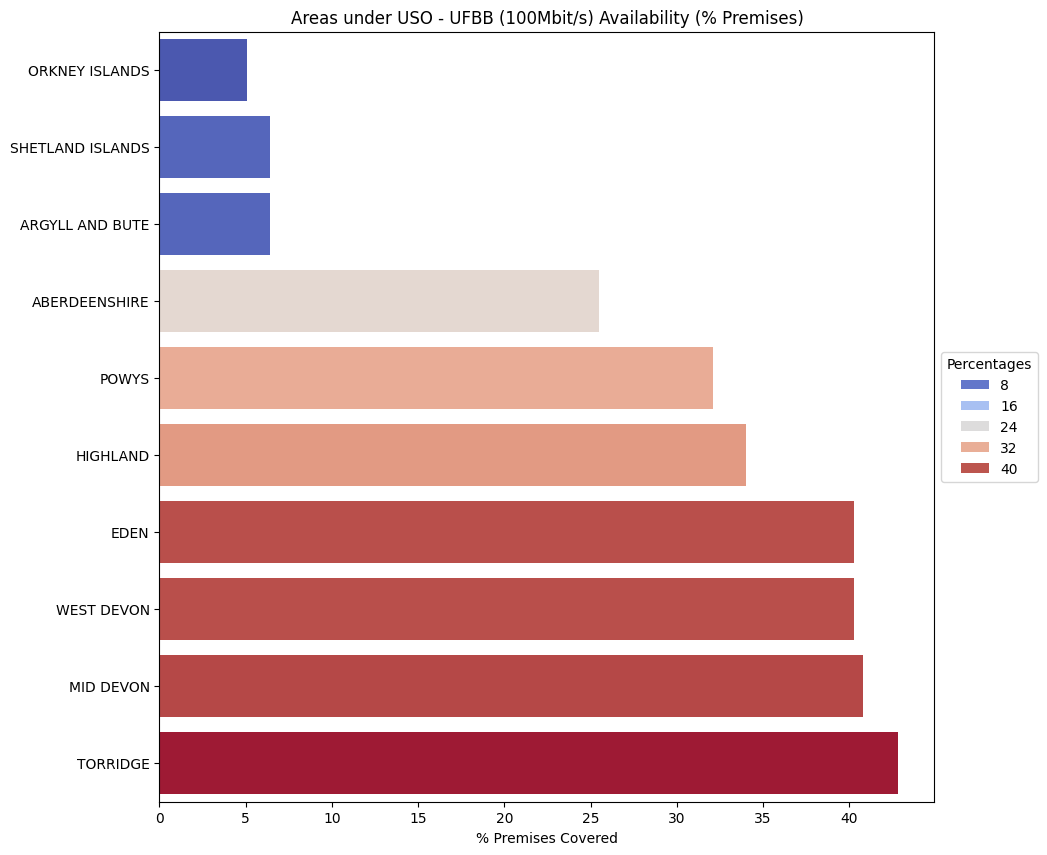

In [33]:
# UFBB Availability
ufbb_sorted = top_10_unable_10mbit_2023.sort_values('UFBB (100Mbit/s) availability (% premises)')
plt.figure(figsize=(10, 10))
sns.barplot(y='laua_name', 
            x='UFBB (100Mbit/s) availability (% premises)', 
            hue='UFBB (100Mbit/s) availability (% premises)', 
            data=ufbb_sorted, 
            palette='coolwarm', 
            dodge=False)

plt.title('Areas under USO - UFBB (100Mbit/s) Availability (% Premises)')
plt.xlabel('% Premises Covered')
plt.ylabel('')
plt.legend(loc='center left', 
           title="Percentages", 
           bbox_to_anchor=(1.0, 0.5))

The availability of UFBB varies significantly across these areas with some regions showing moderate coverage. This indicates a disparity in access to higher-speed broadband, which could contribute to the inability to reach the 10Mbit/s threshold in certain areas.

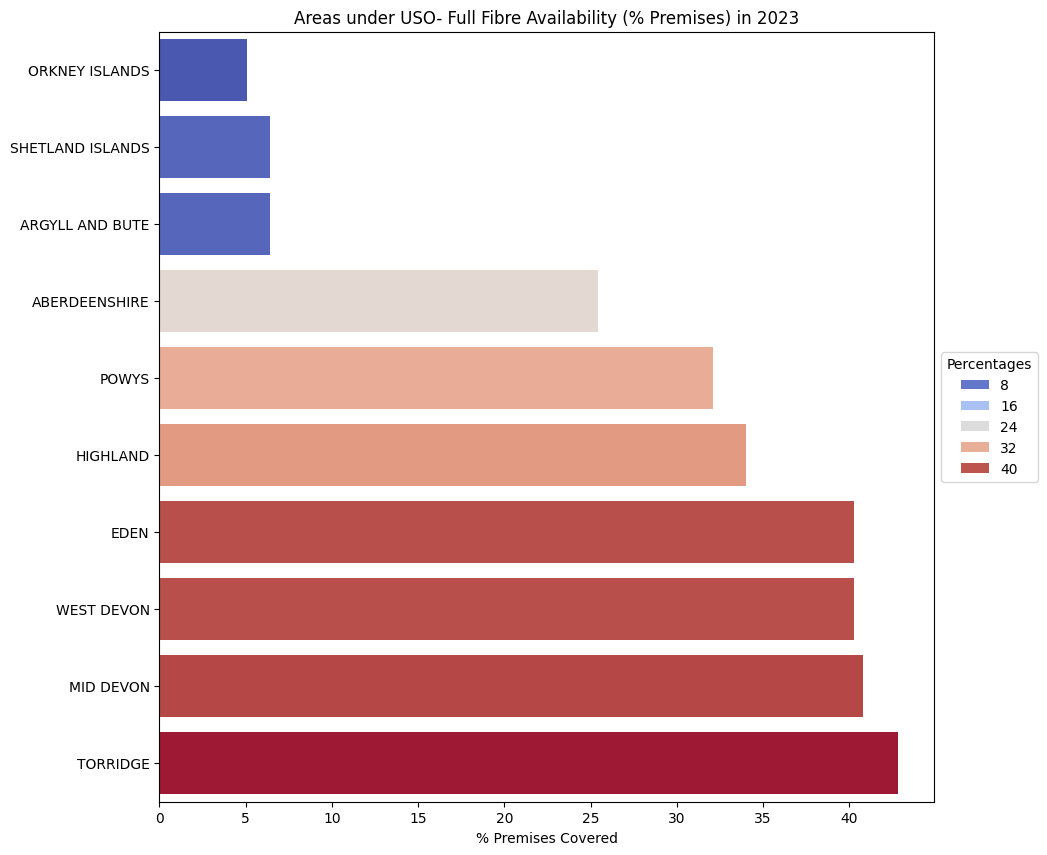

In [34]:
# Full Fibre Availability
full_fibre_sorted = top_10_unable_10mbit_2023.sort_values('Full Fibre availability (% premises)')

plt.figure(figsize=(10, 10))
sns.barplot(y='laua_name', x='Full Fibre availability (% premises)', hue='Full Fibre availability (% premises)', data=full_fibre_sorted, palette='coolwarm', dodge=False)
plt.title('Areas under USO- Full Fibre Availability (% Premises) in 2023')
plt.xlabel('% Premises Covered')
plt.ylabel('')
plt.legend(loc='center left', 
           title="Percentages", 
           bbox_to_anchor=(1.0, 0.5))

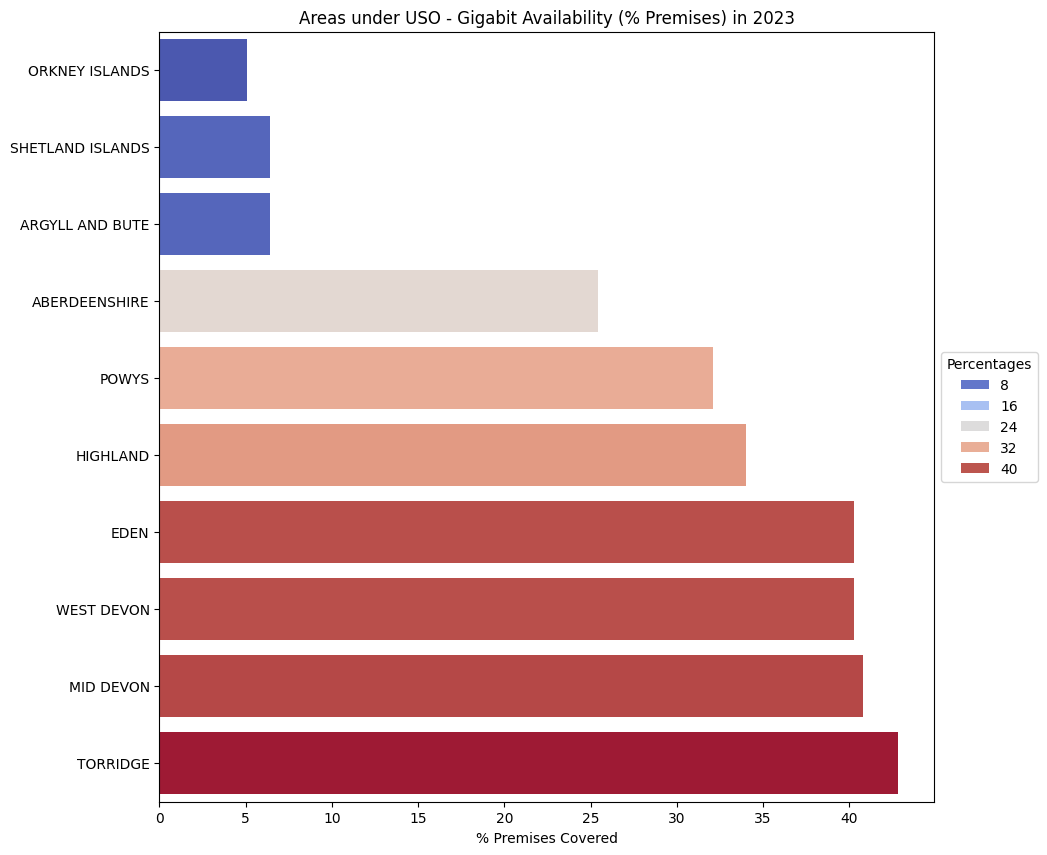

In [35]:
# Gigabit Availability
gigabit_sorted = top_10_unable_10mbit_2023.sort_values('Gigabit availability (% premises)')
plt.figure(figsize=(10, 10))
sns.barplot(y='laua_name', x='Gigabit availability (% premises)', hue='Gigabit availability (% premises)', data=gigabit_sorted, palette='coolwarm', dodge=False)
plt.title('Areas under USO - Gigabit Availability (% Premises) in 2023')
plt.xlabel('% Premises Covered')
plt.ylabel('')
plt.legend(loc='center left', 
           title="Percentages", 
           bbox_to_anchor=(1.0, 0.5))

The Full Fibre and Gigabit Availability charts show variying degrees of coverage, with some areas having noticeably lower availability. This underscores the ongoing challenge of rolling out the most advanced broadband infrastructures to all regions, particularly those with geographical or logistical barriers.

It is evident that Orkney Islands, Shetland Islands, and Argyll and Bute areas have least Full Fibre / Gigabit / UFBB (100Mbit/s) availability. After a brief research, I found out that Argyll and Bute areas accomodate 23 inhabited islands and part of mainland located on the west coast of Scotland. As noted earlier, the reason for the lower availability of high speed broadband in such areas is perhaps the higher cost involved to reach such areas and the physical difficulty to lay fibre optic cables too.

### 7. High-speed broadband access

Next, I will check the distribution of high-speed broadband access. I will focus on the availability of broadband speeds of at least 100Mbit/s, considering this is a benchmark for ultrafast internet services.

Then, I will examine the spread of the highest-speed broadband service, offering speeds of 1Gbit/s or more, which is crucial for the most demanding online activities, including high-definition video streaming, gaming, and large-scale data operations.

For each category, I will identify the areas with the highest and lowest availability. This analysis will help us understand where infrastructure investments have been most effective and where further efforts are needed to ensure equitable access to high-speed internet services. Additionally, I will create visual representations to better illustrate the distribution of these broadband services across the areas in the dataset. 

In [36]:
# Preparing data for UFBB and Gigabit broadband availability analysis
latest_data_ufbb_gigabit = latest_data_df[['laua_name', 'UFBB (100Mbit/s) availability (% premises)', 'Gigabit availability (% premises)']].sort_values(by=['UFBB (100Mbit/s) availability (% premises)', 'Gigabit availability (% premises)'], ascending=False)

# Identifying top and bottom areas for UFBB (100Mbit/s) and Gigabit broadband
top_ufbb = latest_data_ufbb_gigabit.head(10)
bottom_ufbb = latest_data_ufbb_gigabit.tail(10)

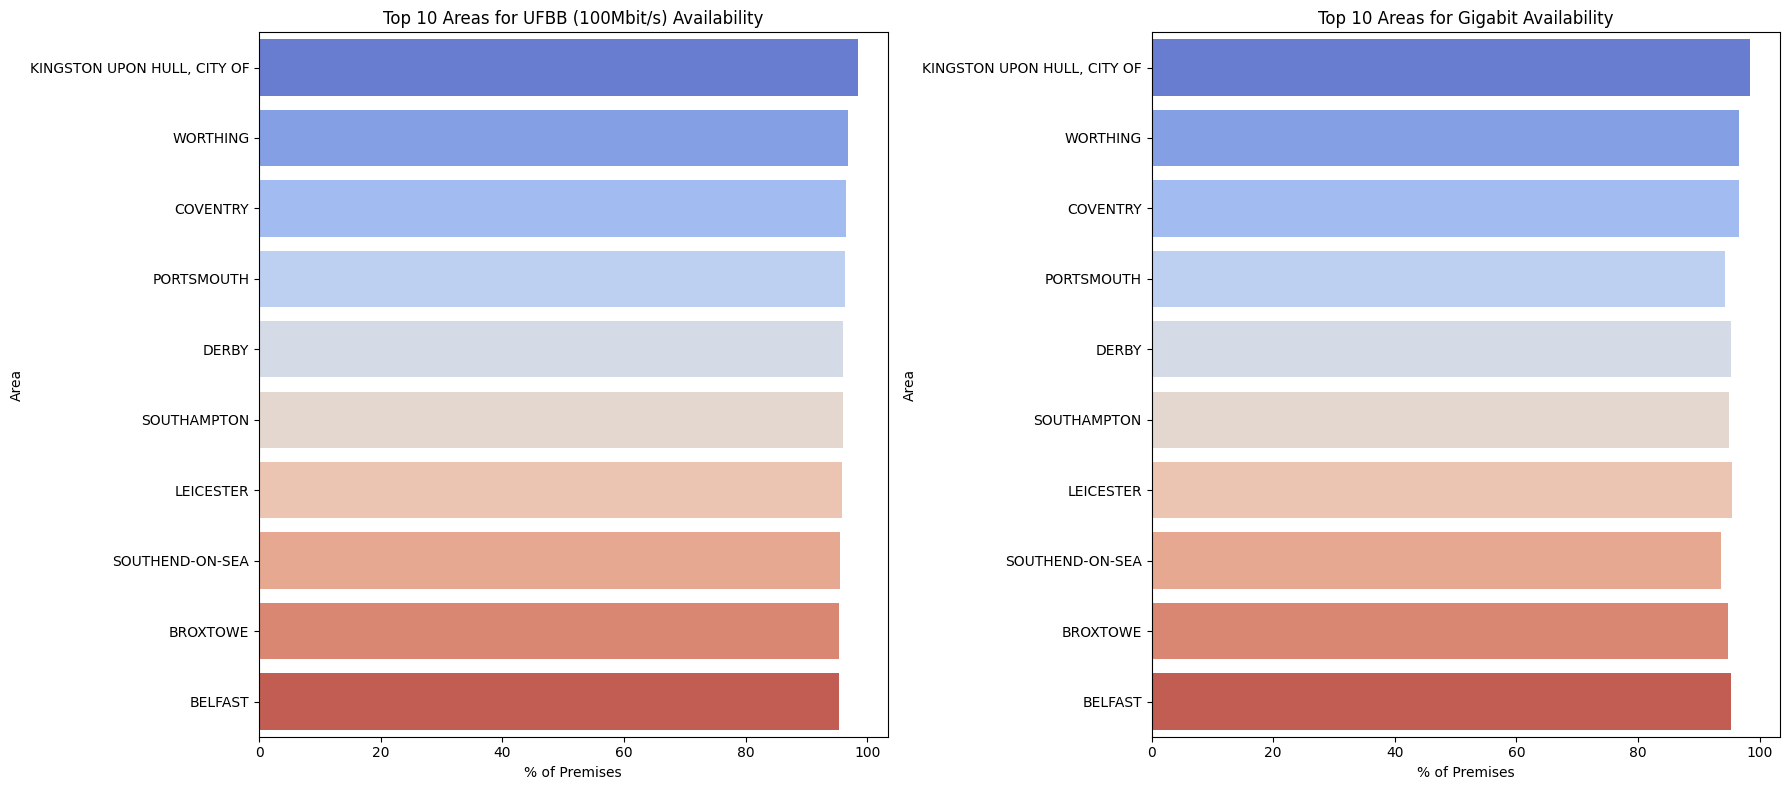

In [37]:
# Plotting the distribution of UFBB (100Mbit/s) and Gigabit broadband availability
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

sns.barplot(ax=axes[0], x='UFBB (100Mbit/s) availability (% premises)', y='laua_name', hue='laua_name', data=top_ufbb, palette='coolwarm', dodge=False)
axes[0].set_title('Top 10 Areas for UFBB (100Mbit/s) Availability')
axes[0].set_xlabel('% of Premises')
axes[0].set_ylabel('Area')

sns.barplot(ax=axes[1], x='Gigabit availability (% premises)', y='laua_name', hue='laua_name', data=top_ufbb, palette='coolwarm', dodge=False)
axes[1].set_title('Top 10 Areas for Gigabit Availability')
axes[1].set_xlabel('% of Premises')
axes[1].set_ylabel('Area')

plt.tight_layout()
plt.show()

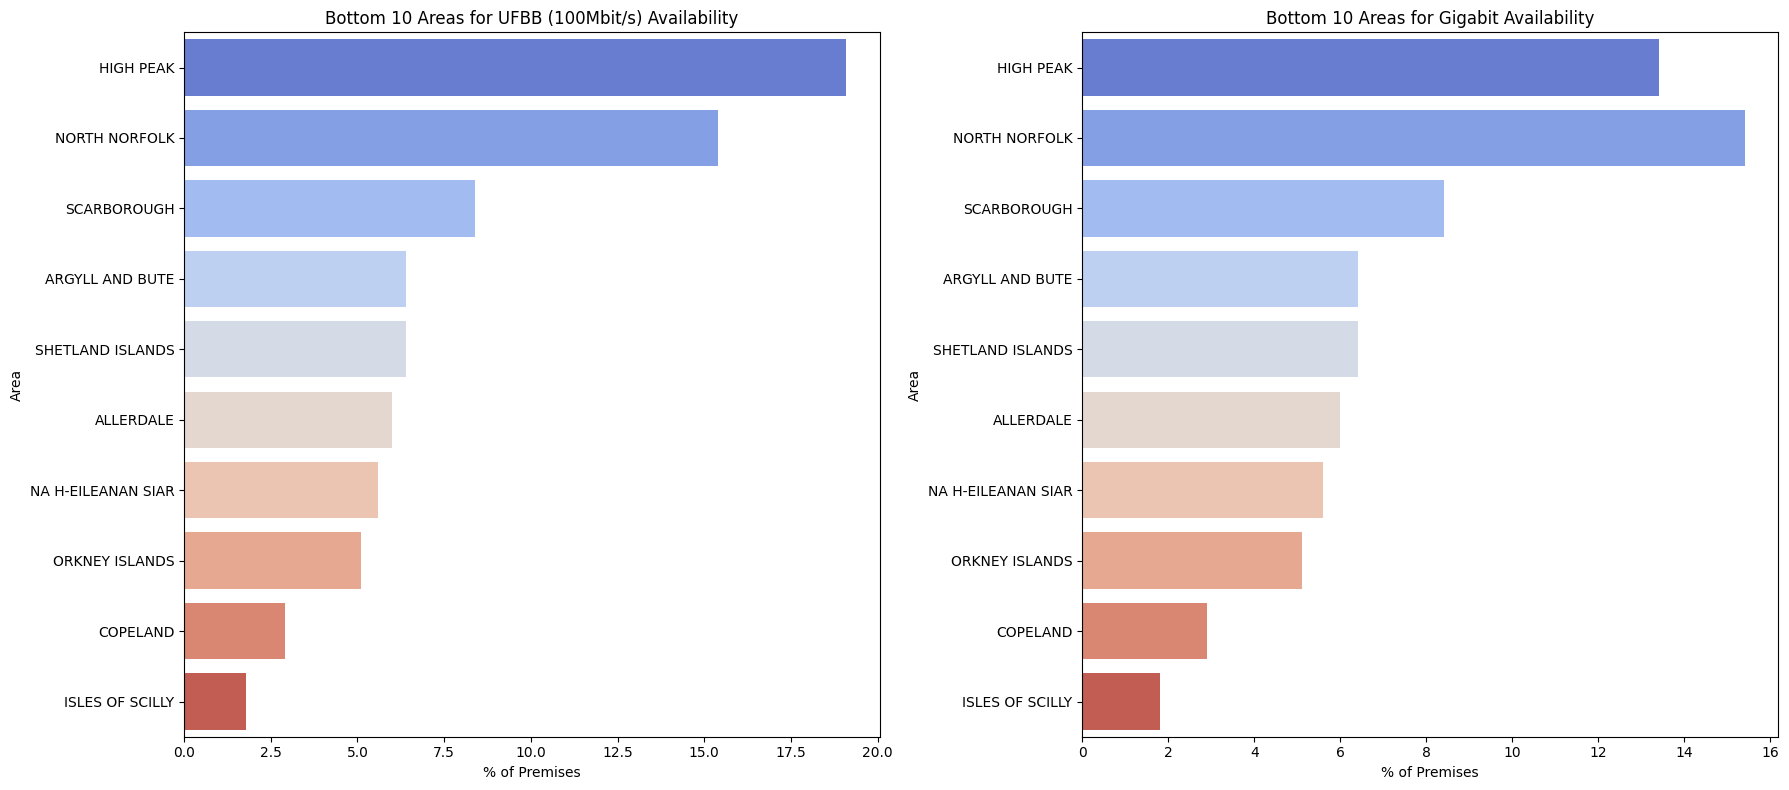

In [38]:
# Plotting the distribution of UFBB (100Mbit/s) and Gigabit broadband availability
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

sns.barplot(ax=axes[0], x='UFBB (100Mbit/s) availability (% premises)', y='laua_name', hue='laua_name', data=bottom_ufbb, palette='coolwarm', dodge=False)
axes[0].set_title('Bottom 10 Areas for UFBB (100Mbit/s) Availability')
axes[0].set_xlabel('% of Premises')
axes[0].set_ylabel('Area')

sns.barplot(ax=axes[1], x='Gigabit availability (% premises)', y='laua_name', hue='laua_name', data=bottom_ufbb, palette='coolwarm', dodge=False)
axes[1].set_title('Bottom 10 Areas for Gigabit Availability')
axes[1].set_xlabel('% of Premises')
axes[1].set_ylabel('Area')

plt.tight_layout()
plt.show()

The analysis and visualisations above highlight the distribution of high-speed broadband access across different areas- focusing on the top 10 areas for Ultrafast Broadband (UFBB) availability (at least 100Mbit/s) and Gigabit Broadband Availability. These insights reveal where infrastructure investments have been most sucessfull in delivering high-speed internet services. 

The areas listed in the visuals represent the regions where a significant portion of premises have access to ultrafast and gigabit broadband, indicating robust digital infrastructure capable of supporting the most bandwidth-intensive activities. This distribution is crucial for understanding where advanced digital services and applications can be deployed effectively and where further investment in broadband infrastructure might be needed to ensure equitable access across all areas.

### 8. Distribution of broadband speeds 

I would like to briefly assess the distribution of broadband speeds across different areas, identify trends in broadband coverage growth, and highlight regions with exceptional or insufficient broadband coverage. (I should have done that in the very begining).

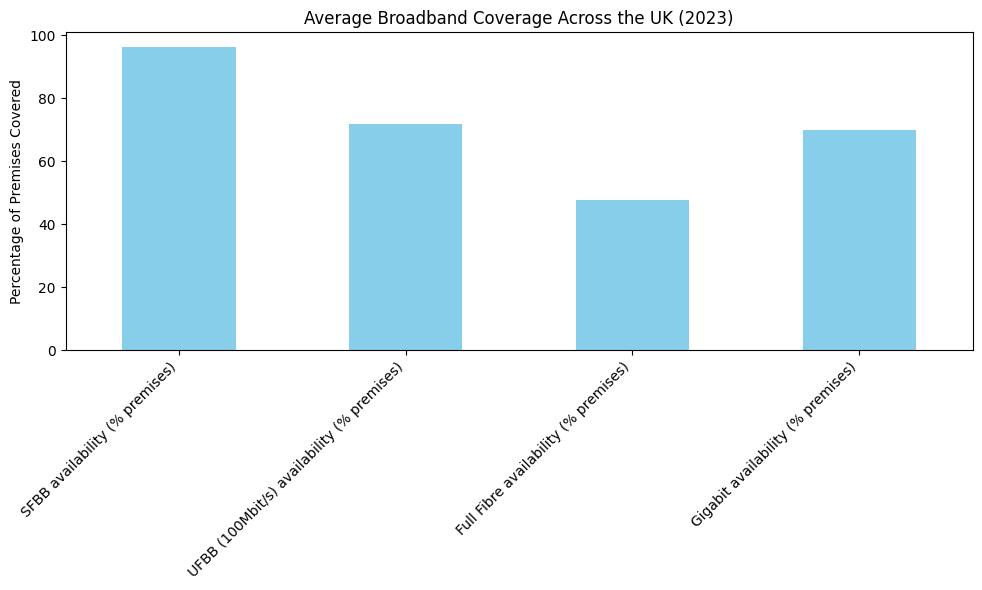

In [39]:
# Data preparation for visualisation
# Grouping data by 'laua_name' to understand the average broadband coverage by area
coverage_metrics = [
    'SFBB availability (% premises)',
    'UFBB (100Mbit/s) availability (% premises)',
    'Full Fibre availability (% premises)',
    'Gigabit availability (% premises)'
]

# Calculate mean availability for each coverage type
coverage_summary = latest_data_df[coverage_metrics].mean()

# Visualising the average broadband coverage across the UK
plt.figure(figsize=(10, 6))
coverage_summary.plot(kind='bar', color='skyblue')
plt.title('Average Broadband Coverage Across the UK (2023)')
plt.ylabel('Percentage of Premises Covered')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.show()

The bar chart above represents the average broadband coverage across the UK for the year 2023, highlighting four key metrics.

On average, a high percentage of premises have access to superfast broadband, indicating a strong SFBB network across most regions.

There's a significant drop in the percentage of premises with access to ultrafast broadband compared to superfast, suggesting UFBB's reach is more limited.

The availability of full fibre broadband, while lower than SFBB, is relatively high in some areas, indicating ongoing investments in fibre infrastructure.

The gigabit broadband coverage, which represents the highest speed tier, shows that a noteworthy percentage of premises can access the fastest internet speeds, although it's less widespread than SFBB.

This overview suggests that while superfast broadband coverage is extensively available across the UK, there's still room for growth in ultrafast, full fibre, and gigabit broadband coverage. The disparities between these coverage types could point to opportunities for infrastructure investment, especially in regions where UFBB, full fibre, and gigabit coverages are low.

### 9. Regional Disparities

I will focus on exploring the regional disparities in broadband coverage. This will involve comparing the different types of broadband availability across various local authority areas to highlight areas with particularly high or low coverage. This way I can identify which local authority areas in the UK are most and least served by these broadband technologies. This will help us understand regional variations in broadband access.

In [40]:
# For regional disparities, we'll create visualizations for each type of broadband coverage
# focusing on the top and bottom regions in terms of coverage percentage.

# Selecting top and bottom 10 regions for each type of broadband coverage
top_bottom_n = 10
sfbb_top = latest_data_df.nlargest(top_bottom_n, 'SFBB availability (% premises)')
sfbb_bottom = latest_data_df.nsmallest(top_bottom_n, 'SFBB availability (% premises)')
ufbb_top = latest_data_df.nlargest(top_bottom_n, 'UFBB (100Mbit/s) availability (% premises)')
ufbb_bottom = latest_data_df.nsmallest(top_bottom_n, 'UFBB (100Mbit/s) availability (% premises)')
full_fibre_top = latest_data_df.nlargest(top_bottom_n, 'Full Fibre availability (% premises)')
full_fibre_bottom = latest_data_df.nsmallest(top_bottom_n, 'Full Fibre availability (% premises)')
gigabit_top = latest_data_df.nlargest(top_bottom_n, 'Gigabit availability (% premises)')
gigabit_bottom = latest_data_df.nsmallest(top_bottom_n, 'Gigabit availability (% premises)')

In [41]:
# Function to plot top and bottom regions
def plot_coverage(data_top, data_bottom, metric, ax, title):
    sns.barplot(x=metric, y='laua_name', hue='group', data=pd.concat([data_top.assign(group='Top'), data_bottom.assign(group='Bottom')]), ax=ax, palette="coolwarm", legend=False)
    ax.set_title(title)
    ax.set_xlabel('Percentage of Premises Covered')
    ax.set_ylabel('')

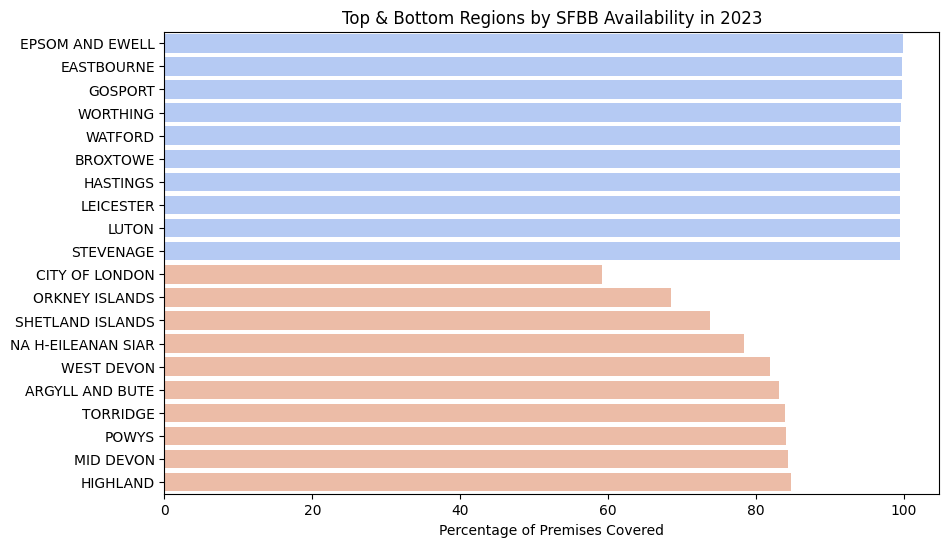

In [42]:
# Plotting individual plots
plt.figure(figsize=(10, 6))

# Plot SFBB availability
plot_coverage(sfbb_top, sfbb_bottom, 'SFBB availability (% premises)', plt.gca(), 'Top & Bottom Regions by SFBB Availability in 2023')

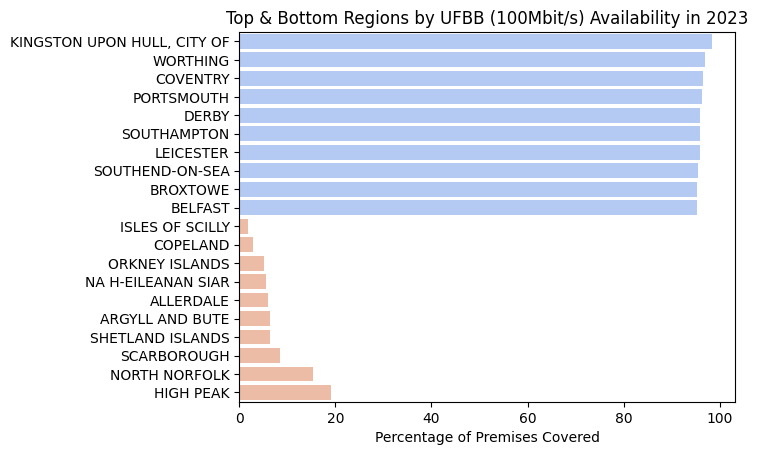

In [43]:
# Plot UFBB availability
plot_coverage(ufbb_top, ufbb_bottom, 'UFBB (100Mbit/s) availability (% premises)', plt.gca(), 'Top & Bottom Regions by UFBB (100Mbit/s) Availability in 2023')
plt.savefig('ufbb_plot.png')

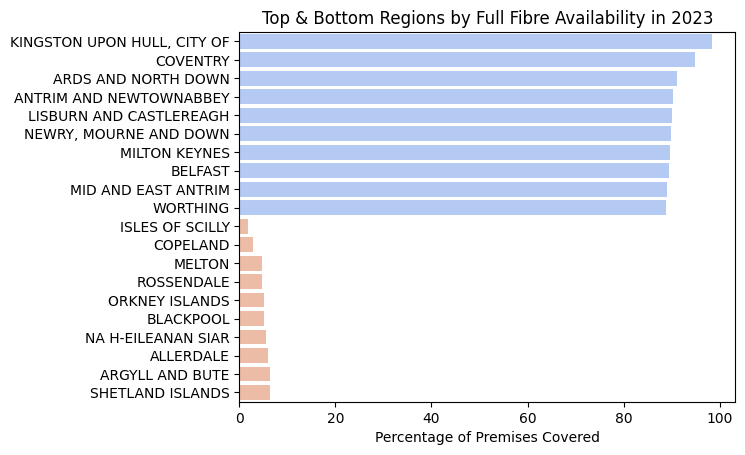

In [44]:
# Plot Full Fibre availability
plot_coverage(full_fibre_top, full_fibre_bottom, 'Full Fibre availability (% premises)', plt.gca(), 'Top & Bottom Regions by Full Fibre Availability in 2023')

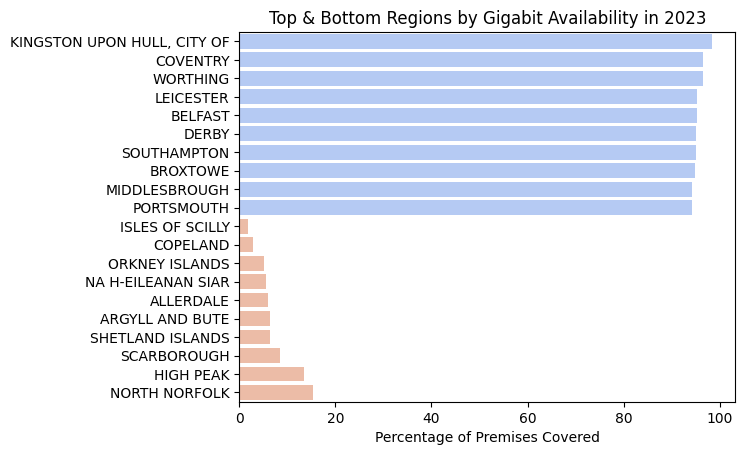

In [45]:
# Plot Gigabit availability
plot_coverage(gigabit_top, gigabit_bottom, 'Gigabit availability (% premises)', plt.gca(), 'Top & Bottom Regions by Gigabit Availability in 2023')
plt.savefig('gigabit_plot.png')

The visualizations above showcase the top and bottom regions in the UK based on the availability of different types of broadband: Superfast Broadband (SFBB), Ultrafast Broadband (UFBB, 100Mbit/s), Full Fibre, and Gigabit coverage. Each chart represents a distinct comparison, highlighting areas with the highest and lowest percentages of premises covered for each broadband type.

### 10. Key Observations

The difference between the top and bottom regions in SFBB availability is less pronounced, indicating a relatively widespread coverage of superfast broadband across the UK. However, some regions still lag behind, showcasing the need for targeted improvements.

The disparity in UFBB availability is more significant, with top regions having a much higher percentage of premises covered compared to the bottom regions. This suggests that the rollout of ultrafast broadband is uneven across the country.

Similar to UFBB, the availability of Full Fibre broadband varies widely between the top and bottom regions. Some areas have made considerable progress in full fibre deployment, while others have very limited coverage.

The variation in gigabit coverage also highlights regional disparities. While some areas boast high gigabit broadband availability, offering the fastest internet speeds, many regions are significantly behind, pointing towards the necessity for infrastructure investment.

**Top 5 Local Authority Areas for Broadband Availability in 2023**

**Full Fibre Availability:**
1. Kingston upon Hull, City of: 98.4%
2. Coventry: 94.8%
3. Ards and North Down: 91.1%
4. Antrim and Newtownabbey: 90.3%
5. Lisburn and Castlereagh: 90.0%

**Gigabit Availability:**
1. Kingston upon Hull, City of: 98.4%
2. Coventry: 96.5%
3. Worthing: 96.5%
4. Leicester: 95.4%
5. Belfast: 95.3%

**Bottom 5 Local Authority Areas for Broadband Availability in 2023**

These are areas that have least broadband availability in terms of Full Fibre and Gigabit availability.

**Full Fibre Availability:**
1. Isles of Scilly: 1.8%
2. Copeland: 2.9%
3. Melton: 4.6%
4. Rossendale: 4.6%
5. Orkney Islands: 5.1%

**Gigabit Availability:**
1. Isles of Scilly: 1.8%
2. Copeland: 2.9%
3. Orkney Islands: 5.1%
4. Na h-Eileanan Siar: 5.6%
5. Allerdale: 6.0%

These disparities highlight areas where broadband infrastructure is exceptionally well-developed, such as Kingston upon Hull, City of, and Coventry, compared to areas like the Isles of Scilly and Copeland, which lag significantly behind in Full Fibre and Gigabit broadband availability. This variance underscores the digital divide within the UK, indicating regions that may need targeted policy interventions and investments to improve broadband access.

### 11. Trend Analysis in Under-Served Areas

I will look at trends over time in areas identified as being under-served in terms of broadband availability. This will help us understand if there have been significant improvements and if policies aimed at increasing broadband coverage are having an impact.

I will examing the year-over-year changes in broadband availability in the bottom 5 local authority areas identified previously. I will calculate the annual growth rate of broadband coverage to assess progress over time.

#### 11.1 SFBB Availability in under served areas

In [46]:
# List of under-served areas based on the previous analysis
underserved_areas = ['ISLES OF SCILLY', 'COPELAND', 'MELTON', 'ROSSENDALE', 'ORKNEY ISLANDS']

# Filtering the dataset for these areas
underserved_sfbb_data = fixed_broadband_df[fixed_broadband_df['laua_name'].isin(underserved_areas)]

# Calculating the yearly average Full Fibre availability for these areas
underserved_trends_sfbb = underserved_sfbb_data.groupby(['year', 'laua_name']).agg({
    'SFBB availability (% premises)': 'mean'
}).reset_index().pivot(index='year', columns='laua_name', values='SFBB availability (% premises)')

In [47]:
underserved_trends_sfbb

laua_name  COPELAND  ISLES OF SCILLY  MELTON  ORKNEY ISLANDS  ROSSENDALE
year                                                                    
2019           94.7             94.5    93.8            65.2        95.1
2020           95.1             94.8    93.8            67.1        94.7
2021           94.6             96.4    93.1            64.3        93.5
2022           95.0             96.7    93.7            65.5        93.9
2023           95.5             97.7    94.2            68.5        95.0

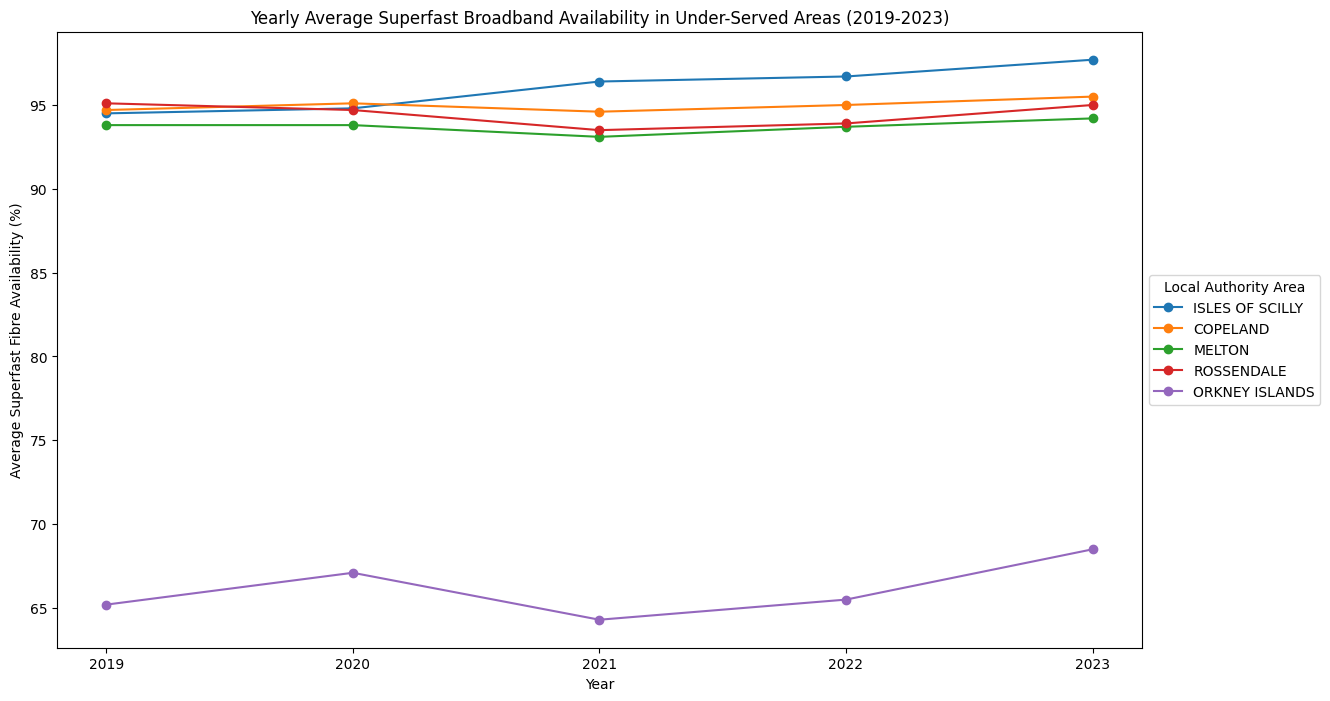

In [48]:
# Plotting
plt.figure(figsize=(14, 8))
for area in underserved_areas:
    if area in underserved_trends_sfbb.columns:  # Corrected this line
        plt.plot(underserved_trends_sfbb.index, underserved_trends_sfbb[area], label=area, marker='o')  # Corrected this line

plt.title('Yearly Average Superfast Broadband Availability in Under-Served Areas (2019-2023)')
plt.xlabel('Year')
plt.ylabel('Average Superfast Fibre Availability (%)')
plt.legend(title='Local Authority Area', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(underserved_trends_sfbb.index)
plt.show()


Orkney Islands being at the bottom of the graph, meaning that it has least availability in terms of superfast broadband, is showing slight improvements after year 2021. It initially had 65% availability in 2019, then it showed a slight increase in 2020 to 67%, and then went down to 64% in 2021 and showing consistent increase from then onwards, reaching 68.5% in 2023. 

The rest of the areas are showing relatively high coverage and very little improvements over the 5 year period.

#### 11.2 UFBB Availability in under served areas

In [49]:
# Filtering the dataset for these areas
underserved_ufbb_data = fixed_broadband_df[fixed_broadband_df['laua_name'].isin(underserved_areas)]

# Calculating the yearly average UFBB availability for these areas
underserved_trends_ufbb = underserved_ufbb_data.groupby(['year', 'laua_name']).agg({
    'UFBB availability (% premises)': 'mean'
}).reset_index().pivot(index='year', columns='laua_name', values='UFBB availability (% premises)')

In [50]:
underserved_trends_ufbb

laua_name  COPELAND  ISLES OF SCILLY  MELTON  ORKNEY ISLANDS  ROSSENDALE
year                                                                    
2019            1.2              0.0    45.7             0.4        42.2
2020            1.6              0.0    46.2             1.1        43.9
2021            1.9              1.6    46.4             1.1        43.2
2022            2.7              1.6    47.3             2.0        45.6
2023            2.9              1.8    47.8             5.1        46.1

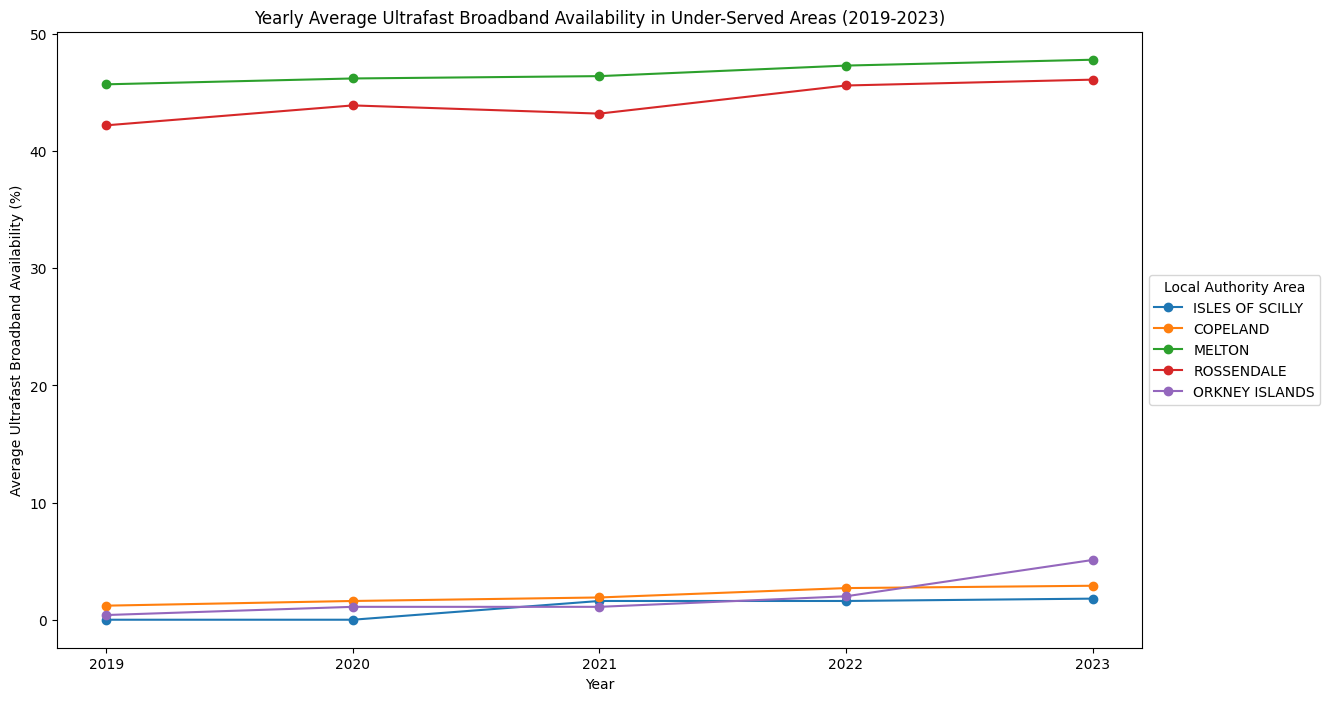

In [51]:
# Plotting
plt.figure(figsize=(14, 8))
for area in underserved_areas:
    if area in underserved_trends_ufbb.columns:  # Corrected this line
        plt.plot(underserved_trends_ufbb.index, underserved_trends_ufbb[area], label=area, marker='o')  # Corrected this line

plt.title('Yearly Average Ultrafast Broadband Availability in Under-Served Areas (2019-2023)')
plt.xlabel('Year')
plt.ylabel('Average Ultrafast Broadband Availability (%)')
plt.legend(title='Local Authority Area', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(underserved_trends_ufbb.index)
plt.show()


Orkney Islands seems to show highest increase in terms of Ultrafast Broadband availability throughout the years from 0.4% to 5.1%, which is positive. Isles of Scilly is also showing a small progress from 0% availability in 2019 to 1.8% in 2023. Similarly, Copeland's ultrafast availability is increasing from 1.2% in 2019 to 2.9% in 2023.

#### 11.3 Full Fibre Availability in under served areas

In [52]:
# Filtering the dataset for these areas
underserved_full_fibre_data = fixed_broadband_df[fixed_broadband_df['laua_name'].isin(underserved_areas)]

# Calculating the yearly average Full Fibre availability for these areas
underserved_trends_full_fibre = underserved_full_fibre_data.groupby(['year', 'laua_name']).agg({
    'Full Fibre availability (% premises)': 'mean'
}).reset_index().pivot(index='year', columns='laua_name', values='Full Fibre availability (% premises)')

In [53]:
underserved_trends_full_fibre

laua_name  COPELAND  ISLES OF SCILLY  MELTON  ORKNEY ISLANDS  ROSSENDALE
year                                                                    
2019            1.2              0.0     1.2             0.4         0.4
2020            1.6              0.0     2.0             1.1         1.4
2021            1.9              1.6     2.6             1.1         1.5
2022            2.7              1.6     4.0             2.0         4.3
2023            2.9              1.8     4.6             5.1         4.6

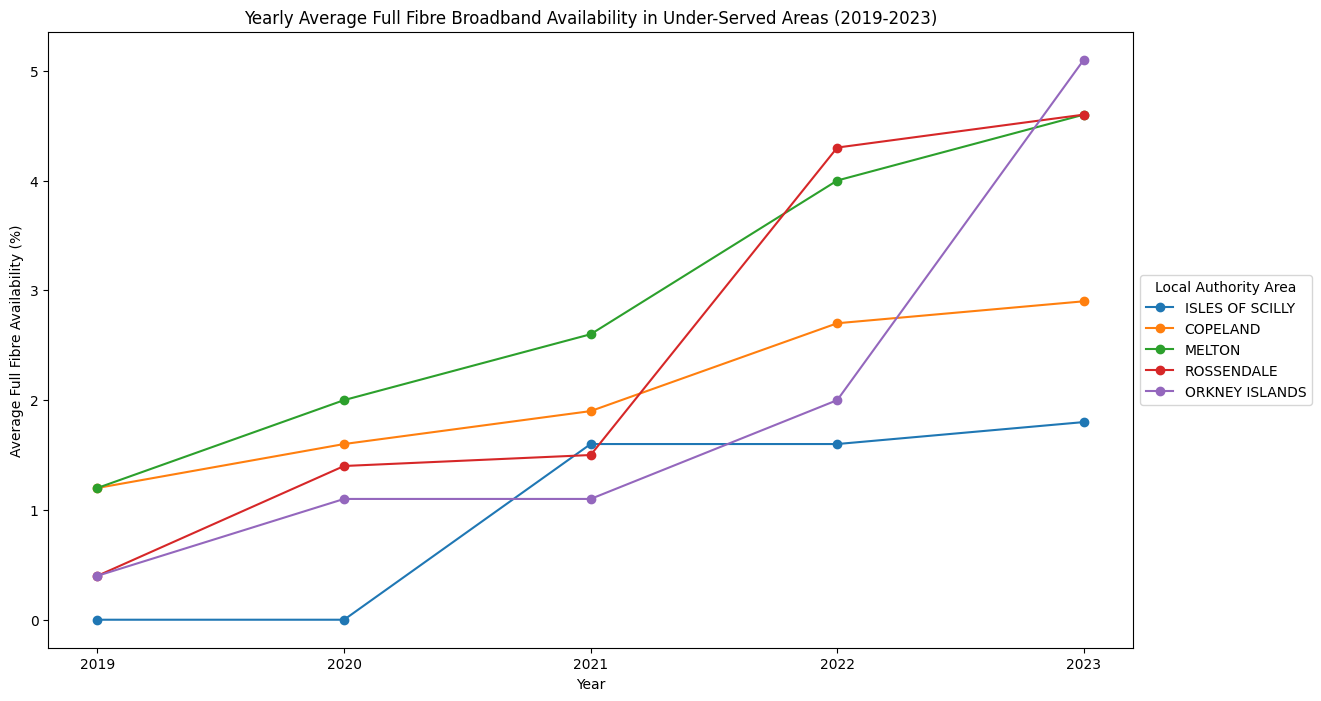

In [54]:
plt.figure(figsize=(14, 8))
for area in underserved_areas:
    if area in underserved_trends_full_fibre.columns:  # Corrected this line
        plt.plot(underserved_trends_full_fibre.index, underserved_trends_full_fibre[area], label=area, marker='o')  # Corrected this line

plt.title('Yearly Average Full Fibre Broadband Availability in Under-Served Areas (2019-2023)')
plt.xlabel('Year')
plt.ylabel('Average Full Fibre Availability (%)')
plt.legend(title='Local Authority Area', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(underserved_trends_full_fibre.index)
plt.show()

The chart above displays the yearly average Full Fibre broadband availability from 2019 to 2023 in the local authority areas previously identified as under-served: Isles of Scilly, Copeland, Melton, Rossendale, and Orkney Islands. Here's what we can observe.

Each under-served area shows a different rate of improvement in Full Fibre broadband availability over the five-year period. This suggests that while some areas may be benefiting from targeted interventions or investments, others are experiencing slower progress.

Despite being under-served, most areas demonstrate a gradual increase in Full Fibre availability, indicating ongoing efforts to enhance broadband infrastructure. However, the starting points and the pace of improvement vary significantly.

Even with improvements, these areas still have relatively low levels of Full Fibre broadband availability compared to the top-performing areas. This underscores the challenge of bridging the digital divide and ensuring equitable access to high-quality broadband across all regions.

### 12. City of Kingston upon Hull versus Isles of Scilly

From the visualisations above I noted that Isles of Scilly represents a region with one of the lower Full Fibre availabilities. While Kingston upon Hull, City of stands out with one of the highest Full Fibre availabilities.

These two regions present contrasting scenarious in terms of broadband infrastructure, offering insights into the potential factors influencing their broadband coverage statuses.

In [55]:
# Filter the dataset for Isles of Scilly and Kingston upon Hull
scilly_data = fixed_broadband_df[fixed_broadband_df['laua_name'].str.contains("SCILLY", case=False)]
hull_data = fixed_broadband_df[fixed_broadband_df['laua_name'].str.contains("KINGSTON UPON HULL", case=False)]

In [56]:
# Merge the datasets for plotting
merged_data = pd.concat([scilly_data, hull_data])

In [57]:
# Pivot the data for easier plotting
pivot_data = merged_data.pivot(index='year', columns='laua_name', values=['SFBB availability (% premises)', 
                                                                          'UFBB availability (% premises)', 
                                                                          'Full Fibre availability (% premises)', 
                                                                          'Gigabit availability (% premises)'])

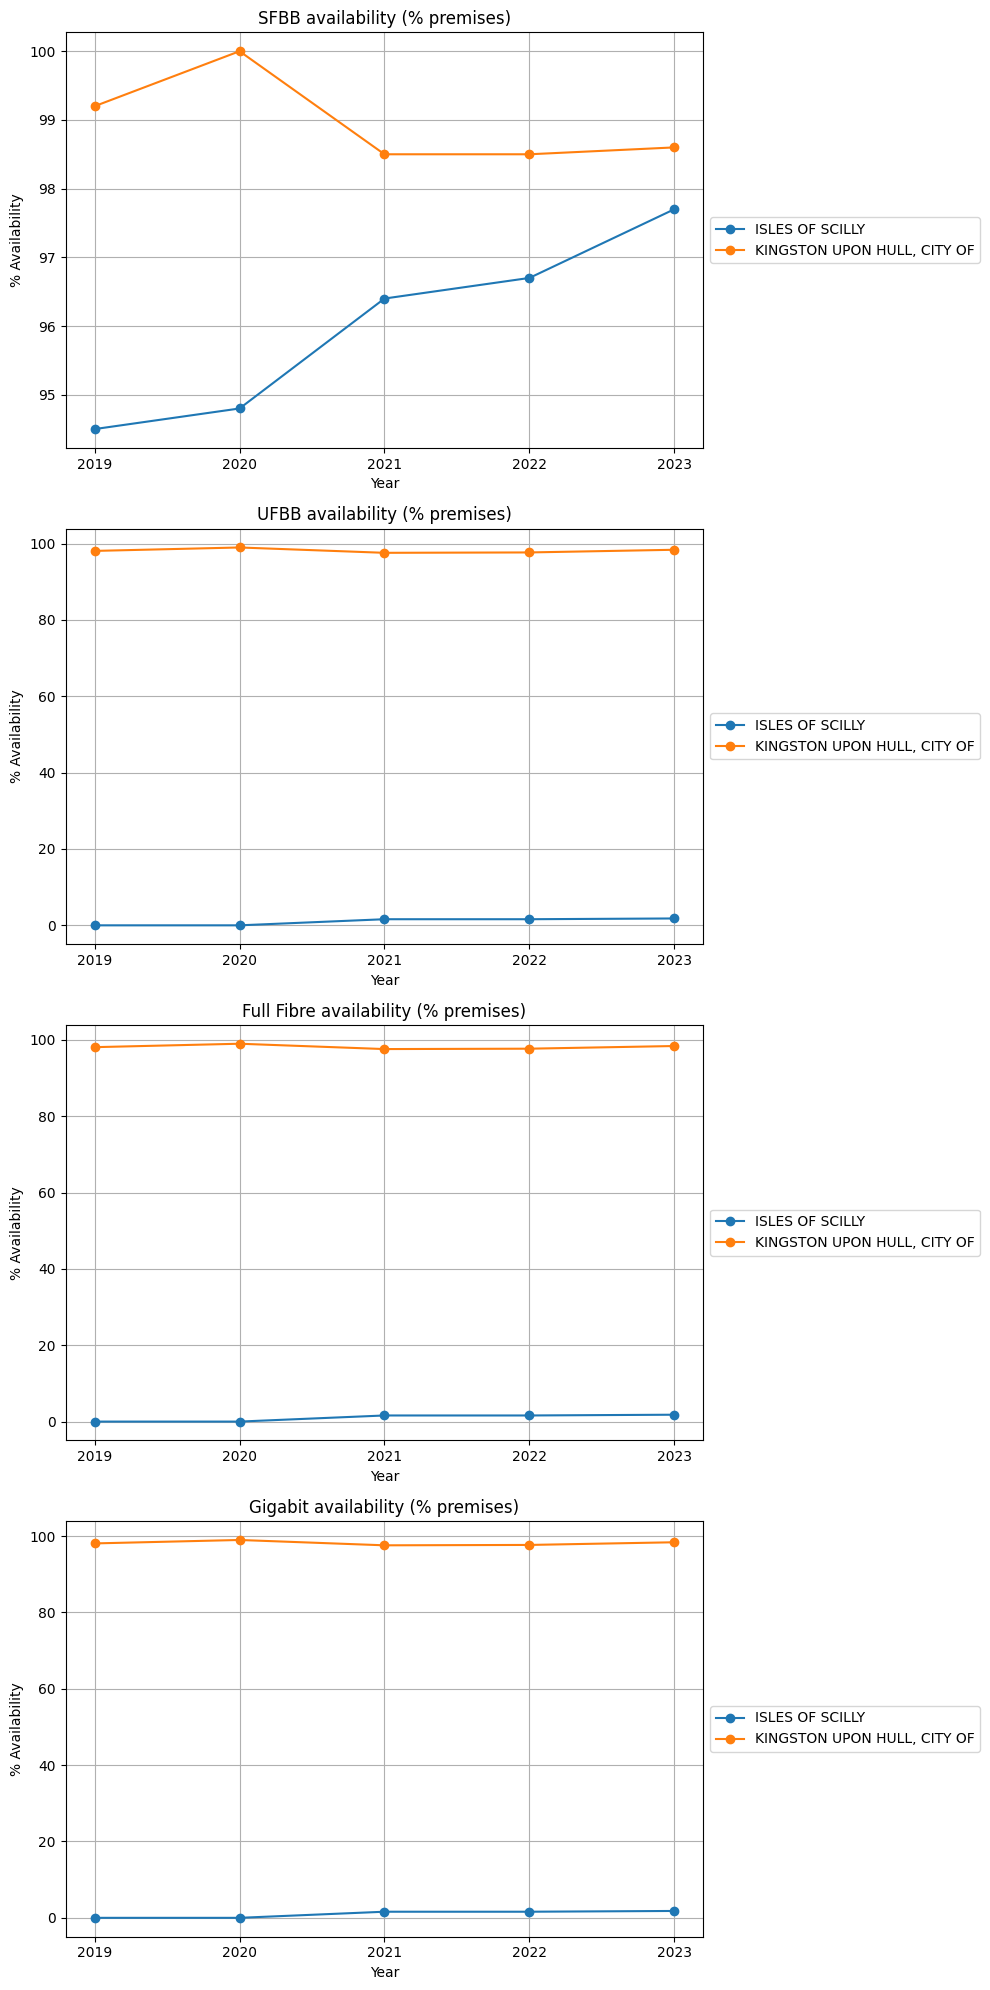

In [58]:
# Plotting
fig, axs = plt.subplots(4, 1, figsize=(10, 20))

metrics = ['SFBB availability (% premises)', 
           'UFBB availability (% premises)', 
           'Full Fibre availability (% premises)', 
           'Gigabit availability (% premises)']

for i, metric in enumerate(metrics):
    for column in pivot_data[metric].columns:
        pivot_data[metric][column].plot(ax=axs[i], marker='o', label=column)
    axs[i].set_title(metric)
    axs[i].set_ylabel('% Availability')
    axs[i].set_xlabel('Year')
    axs[i].set_xticks(pivot_data.index)
    axs[i].grid(True)
    axs[i].legend(loc='center left', bbox_to_anchor=(1.0, 0.5)) 

plt.tight_layout()
plt.show()


The Isles of Scilly has significantly lower availability of UFBB and Full Fibre broadband compared to Kingston upon Hull. Its geographical location as an island community likely presents unique challenges for broadband infrastructure development, such as higher costs and logistical difficulties in laying fibre. 

The data suggests minimal change in UFBB and Full Fibre availability over the observed years, indicating that upgrades to broadband infrastructure have been limited or slow to progress.

The City of Kingston upon Hull exhibits a high percentage of premises with access to UFBB and Full Fibre broadband, likely benefiting from focused infrastructure investments and a competitive market for broadband services. The consistently high coverage percentages suggest that Kingston upon Hull has seen significant investments in its broadband infrastructure, possibly supported by local policies or initiatives aimed at enhancing digital connectivity. 

What I have discovered earlier about the Orkney and Shetland Islands, as well as Argyl and Bute, and now the Island of Scilly, I think that remote or island communities face more significant challenges in broadband rollout due to higher costs and logistical complexities. 

Urban areas or those with strategic economic significance might receive more attention from policymakers and private investors, facilitating faster broadband infrastructure developmnet.

Regions with active competiton among broadband providers may see quicker upgrades to faster broadband technologies to win or retain customers.

The disparities between these regions highlight the importance of tailored strategies to overcome geographic and economic barriers to broadband access. Policy interventions, such as funding for rural broadband or incentives for private investment in underserved areas, could help address the digital divide.

### 13. Analysis of Download Speed Categories

I can analyse the distribution of premises across different download speed categories, especially focusing on the extremes, very low vs very high speeds. This could highlight discrepancies between availability and actual user experiences.

In [59]:
# Analysis of Download Speed Categories for the most recent year
download_speed_categories = [
    '% of premises unable to receive 2Mbit/s',
    '% of premises unable to receive 5Mbit/s',
    '% of premises unable to receive 10Mbit/s',
    '% of premises unable to receive 30Mbit/s'
]

In [60]:
# Calculating average percentages for each download speed category
avg_download_speeds = latest_data_df[download_speed_categories].mean()
avg_download_speeds

% of premises unable to receive 2Mbit/s     0.274064
% of premises unable to receive 5Mbit/s     0.679412
% of premises unable to receive 10Mbit/s    1.239305
% of premises unable to receive 30Mbit/s    3.645455
dtype: float64

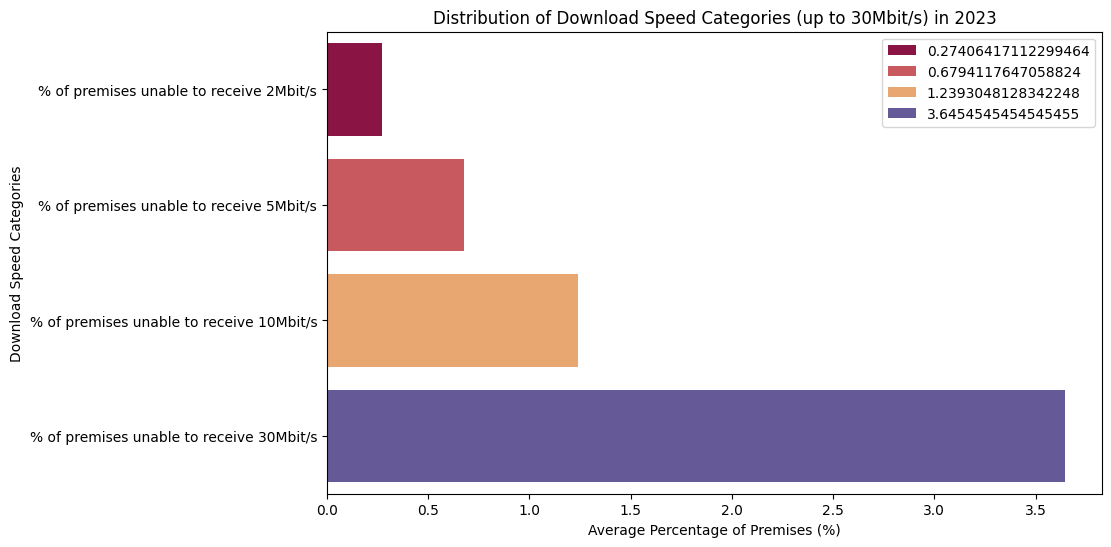

In [61]:
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_download_speeds.values, 
            y=avg_download_speeds.index, 
            hue=avg_download_speeds.values, 
            palette="Spectral")
plt.title(f'Distribution of Download Speed Categories (up to 30Mbit/s) in 2023')
plt.xlabel('Average Percentage of Premises (%)')
plt.ylabel('Download Speed Categories')
plt.show()


The bar chart presents the distribution of premises across various download speed categories for the most recent year available in our dataset, 2023. It shows the average percentage of premises unable to receive specific download speeds: 2Mbit/s, 5Mbit/s, 10Mbit/s, and 30Mbit/s

A relatively small percentage of premises are unable to receive the lowest download speeds (2Mbit/s and 5Mbit/s), suggesting that basic internet access is widely available across most areas.

As the speed threshold increases to 10Mbit/s and especially to 30Mbit/s, a larger percentage of premises fall into these categories. This indicates that while basic internet coverage is extensive, access to higher speeds remains more limited.

The significant increase in premises unable to receive 30Mbit/s highlights a digital divide not just in terms of broadband availability but also in the quality and speed of the service. This could impact users' ability to engage in more bandwidth-intensive activities, such as streaming high-definition video or participating in online gaming.

These findings underscore the importance of not only expanding broadband infrastructure to increase availability but also improving the quality of service to ensure higher speeds are accessible. This is crucial for supporting a wide range of digital activities and ensuring equitable access to the benefits of the digital economy.

### 14. Regional Variations Analysis

An interesting next step would be to explore regional variations in broadband speed availability. By focusing on this aspect, we can identify areas that not only lack access to broadband but also suffer from lower quality of service in terms of speed. I will begin by identifying regions with the highest and lowest average availability of broadband speeds above 30Mbit/s, as this speed threshold is commonly associated with enabling a broader range of online activities. Afterward, I will select a few of these regions to examine their speed availability trends over time.

In [62]:
# Calculating the regional average availability of broadband speeds above 30Mbit/s for the most recent year
speed_above_30mbps = '% of premises unable to receive 30Mbit/s'

regional_speed_availability = latest_data_df.groupby('laua_name').agg({
    speed_above_30mbps: 'mean'
}).reset_index()

regional_speed_availability

laua_name  % of premises unable to receive 30Mbit/s
0    ABERDEEN CITY                                       2.8
1    ABERDEENSHIRE                                      13.8
2             ADUR                                       0.8
3        ALLERDALE                                       6.6
4     AMBER VALLEY                                       2.7
..             ...                                       ...
369        WREXHAM                                       3.0
370       WYCHAVON                                       3.6
371           WYRE                                       2.6
372    WYRE FOREST                                       2.0
373           YORK                                       4.4

[374 rows x 2 columns]

In [63]:
# Identifying regions with the highest and lowest average availability (i.e., lowest and highest percentages unable to receive 30Mbit/s)
highest_availability = regional_speed_availability.nsmallest(5, speed_above_30mbps)
lowest_availability = regional_speed_availability.nlargest(5, speed_above_30mbps)

In [64]:
highest_availability

laua_name  % of premises unable to receive 30Mbit/s
172  KINGSTON UPON HULL, CITY OF                                       0.0
118              EPSOM AND EWELL                                       0.2
112                   EASTBOURNE                                       0.3
134                      GOSPORT                                       0.3
345                      WATFORD                                       0.3

In [65]:
lowest_availability

laua_name  % of premises unable to receive 30Mbit/s
74     CITY OF LONDON                                      40.0
237    ORKNEY ISLANDS                                      29.4
277  SHETLAND ISLANDS                                      25.4
350        WEST DEVON                                      17.8
332          TORRIDGE                                      15.8

In [66]:
# Examining trends over time for a selection of regions from the extremes
selected_regions_high = highest_availability['laua_name'].tolist()
selected_regions_low = lowest_availability['laua_name'].tolist()

In [67]:
# Filtering data for these selected regions
selected_data_high = fixed_broadband_df[fixed_broadband_df['laua_name'].isin(selected_regions_high)]
selected_data_low = fixed_broadband_df[fixed_broadband_df['laua_name'].isin(selected_regions_low)]

In [68]:
# Calculating the yearly average for these regions
trends_high = selected_data_high.groupby(['year', 'laua_name']).agg({
    speed_above_30mbps: 'mean'
}).reset_index().pivot(index='year', columns='laua_name', values=speed_above_30mbps)
trends_high

laua_name  EASTBOURNE  EPSOM AND EWELL  GOSPORT  KINGSTON UPON HULL, CITY OF  \
year                                                                           
2019              1.3              0.8      0.2                          0.8   
2020              1.2              0.4      0.3                          0.0   
2021              0.8              0.4      0.4                          0.0   
2022              0.4              0.4      0.4                          0.0   
2023              0.3              0.2      0.3                          0.0   

laua_name  WATFORD  
year                
2019           0.7  
2020           0.6  
2021           0.5  
2022           0.3  
2023           0.3

In [69]:
trends_low = selected_data_low.groupby(['year', 'laua_name']).agg({
    speed_above_30mbps: 'mean'
}).reset_index().pivot(index='year', columns='laua_name', values=speed_above_30mbps)
trends_low

laua_name  CITY OF LONDON  ORKNEY ISLANDS  SHETLAND ISLANDS  TORRIDGE  \
year                                                                    
2019                 46.0            34.8              29.7      18.7   
2020                 43.4            32.9              27.7      18.7   
2021                 42.0            31.2              26.5      18.2   
2022                 39.3            31.9              27.7      16.8   
2023                 40.0            29.4              25.4      15.8   

laua_name  WEST DEVON  
year                   
2019             22.8  
2020             21.8  
2021             20.4  
2022             18.5  
2023             17.8

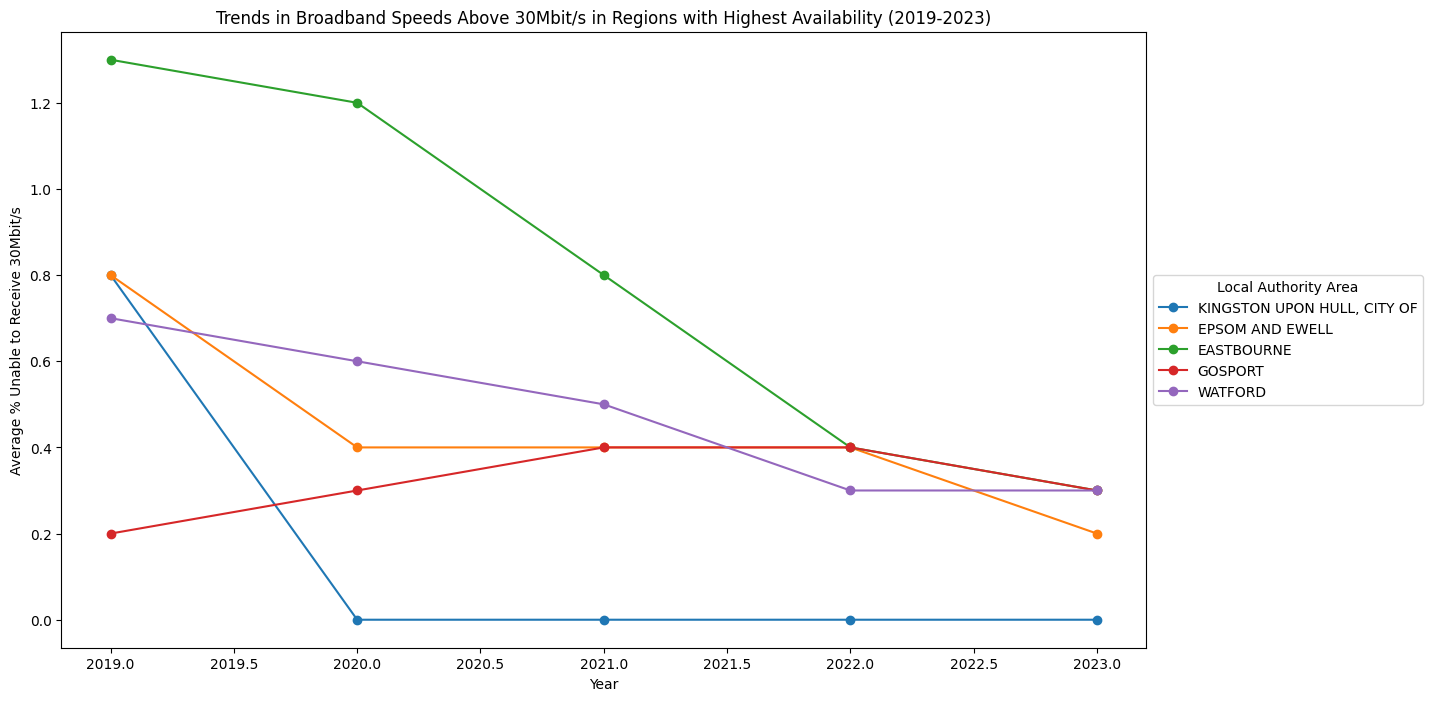

In [70]:
# Plotting the trends
plt.figure(figsize=(14, 8))

for region in selected_regions_high:
    if region in trends_high.columns:
        plt.plot(trends_high.index, trends_high[region], label=region, marker='o')

plt.title('Trends in Broadband Speeds Above 30Mbit/s in Regions with Highest Availability (2019-2023)')
plt.xlabel('Year')
plt.ylabel('Average % Unable to Receive 30Mbit/s')
plt.legend(title='Local Authority Area', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

The trends in regions with the highest availability show a decreasing percentage of premises unable to receive speeds above 30Mbit/s over time. This improvement indicates effective efforts to increase high-speed broadband access in these areas.

The positive trend suggests that these regions are likely benefiting from targeted investments in broadband infrastructure, enhancing the overall quality of internet service available to residents and businesses.

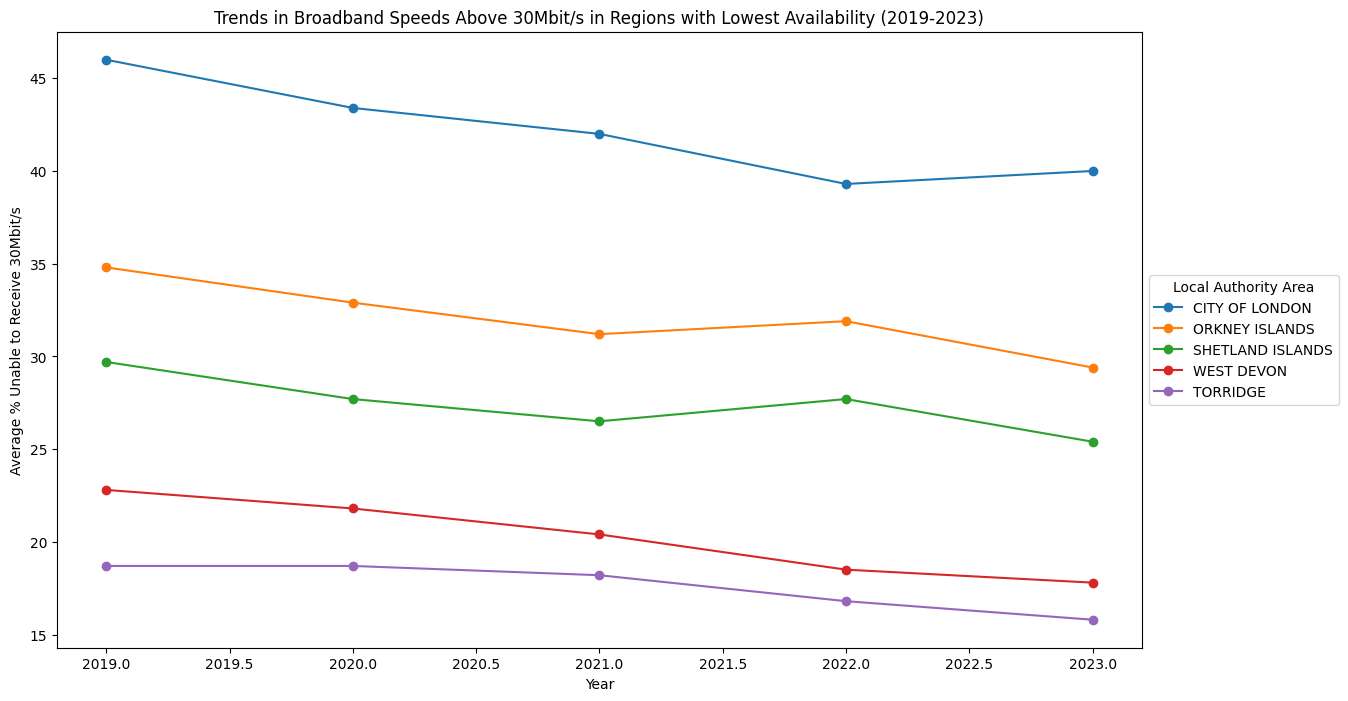

In [71]:
plt.figure(figsize=(14, 8))

for region in selected_regions_low:
    if region in trends_low.columns:
        plt.plot(trends_low.index, trends_low[region], label=region, marker='o')

plt.title('Trends in Broadband Speeds Above 30Mbit/s in Regions with Lowest Availability (2019-2023)')
plt.xlabel('Year')
plt.ylabel('Average % Unable to Receive 30Mbit/s')
plt.legend(title='Local Authority Area', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


Conversely, in regions with the lowest availability, the charts reveal that a significant portion of premises remains unable to access speeds above 30Mbit/s, although there is a general trend towards improvement.
The slower pace of improvement in these areas highlights the challenges in expanding high-speed broadband access, possibly due to geographical, economic, or logistical constraints.

### 15. Correlation in broadband type availability

I will generate a heatmap showing the correlation between different types of broadband availability to see how the presence of one type might relate to the availability of others.

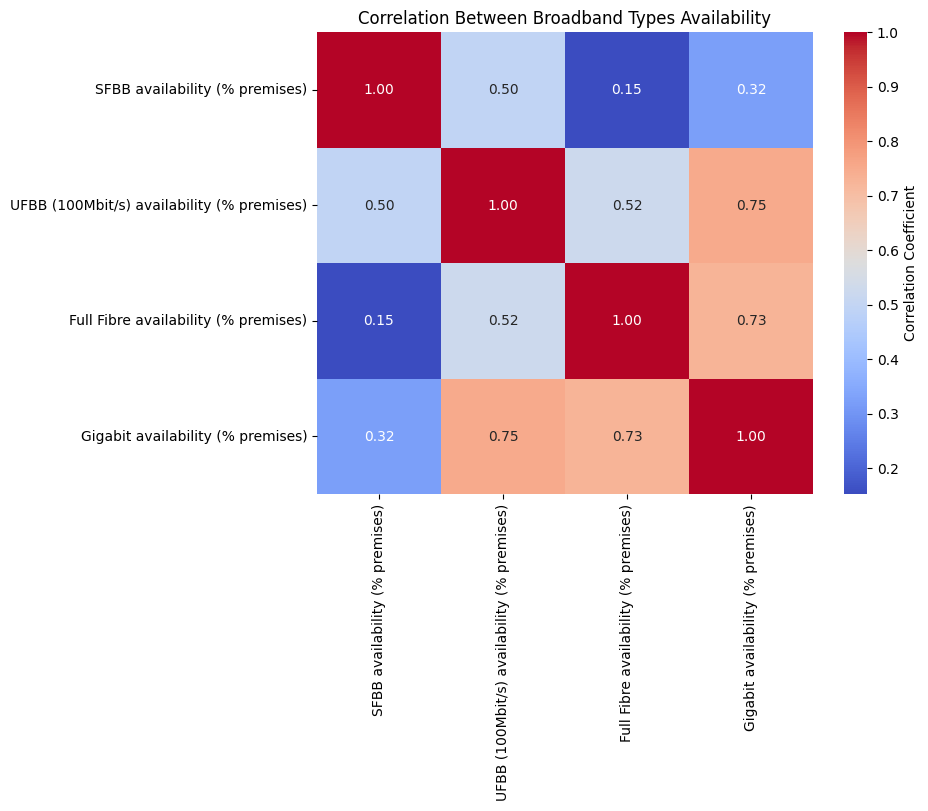

In [72]:
# Preparing data for correlation analysis
correlation_data = fixed_broadband_df[['SFBB availability (% premises)',
                         'UFBB (100Mbit/s) availability (% premises)',
                         'Full Fibre availability (% premises)',
                         'Gigabit availability (% premises)']]

# Calculating the correlation matrix
correlation_matrix = correlation_data.corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Between Broadband Types Availability')
plt.show()


The heatmap displays the correlation between different broadband types' availability across regions. The correlation coefficients range from -1 to 1, where values closer to 1 indicate a strong positive correlation, values closer to -1 indicate a strong negative correlation, and values around 0 suggest no linear correlation.

**Observations**

Superfast Broadband (SFBB) shows a moderate to strong positive correlation with other broadband types, indicating that regions with high SFBB coverage tend to also have higher availability of other broadband types.

Ultrafast Broadband (UFBB) 100Mbit/s, Full Fibre, and Gigabit Broadband display strong positive correlations with each other. This suggests that advancements in broadband infrastructure in certain regions benefit multiple types of high-speed internet access.

### 16. Folium maps - SFBB, UFBB, Gigabit, Full Fibre

In [73]:
import json

# Load the GeoJSON file for local authority boundaries
geojson_path = '2023J_TMA02_data/Boundaries/Local_Authority_Districts_December_2022_UK_BUC_V2_epsg4326.geojson'
with open(geojson_path) as f:
    la_boundaries = json.load(f)

# Display the first feature to understand its structure
la_boundaries['features'][0]



{'type': 'Feature',
 'properties': {'FID': 1,
  'LAD22CD': 'E06000001',
  'LAD22NM': 'Hartlepool',
  'BNG_E': 447160,
  'BNG_N': 531474,
  'LONG': -1.27018,
  'LAT': 54.67614,
  'GlobalID': '0c2caf9e-a186-4be5-81a1-ff4fcc433ee5'},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-1.241170227374993, 54.72332489789277],
    [-1.240979843007304, 54.72318348692135],
    [-1.176154551917004, 54.69767558427453],
    [-1.173999679691438, 54.69186437323956],
    [-1.174178165277769, 54.69187084023117],
    [-1.196240961771891, 54.69857286688103],
    [-1.188027070577697, 54.69335074377705],
    [-1.188849534874278, 54.69240147283096],
    [-1.192091214115789, 54.692518476687056],
    [-1.19435827355379, 54.68604211304664],
    [-1.199092276217304, 54.68057531023039],
    [-1.175868906333615, 54.65340934498992],
    [-1.157622586837759, 54.64819481097179],
    [-1.173151656053154, 54.633703847918184],
    [-1.188235396611407, 54.6325929600859],
    [-1.192265783476607, 54.6294543020667],
  

#### 16.1 Full Fibre availability (% premises)

In [74]:
# Create a base map
map_full_fibre = folium.Map(location=[55.3781, -3.4360], zoom_start=5, tiles="cartodbpositron")

# Add the Choropleth layer for Full Fibre availability
folium.Choropleth(
    geo_data=la_boundaries,
    name="Full Fibre Availability",
    data=latest_data_df,
    columns=["laua", "Full Fibre availability (% premises)"],
    key_on="feature.properties.LAD22CD",
    fill_color="YlGn",
    fill_opacity=1,
    line_opacity=0.2,
    legend_name="Full Fibre Availability (%)",
    smooth_factor=0
).add_to(map_full_fibre)


# Save the map to an HTML file
map_full_fibre.save('2023J_TMA02_data/choropleth_map_full_fibre_coverage.html')

map_full_fibre

#### 16.2 Gigabit Broadband Availability (%)

In [75]:
# Create a base map
map_gigabit = folium.Map(location=[55.3781, -3.4360], zoom_start=5, tiles="cartodbpositron")

# Add the Choropleth layer for Full Fibre availability
folium.Choropleth(
    geo_data=la_boundaries,
    name="Gigabit Broadband Availability",
    data=latest_data_df,
    columns=["laua", "Gigabit availability (% premises)"],
    key_on="feature.properties.LAD22CD",
    fill_color="YlGn",
    fill_opacity=1,
    line_opacity=0.2,
    legend_name="Gigabit Broadband Availability (%)",
    smooth_factor=0
).add_to(map_gigabit)


# Save the map to an HTML file
map_gigabit.save('2023J_TMA02_data/choropleth_map_gigabit_coverage.html')

map_gigabit

#### 16.3 UFBB (100Mbit/s) availability (% premises)

In [76]:
# Create a base map
map_ufbb_100 = folium.Map(location=[55.3781, -3.4360], zoom_start=5, tiles="cartodbpositron")

# Add the Choropleth layer for Full Fibre availability
folium.Choropleth(
    geo_data=la_boundaries,
    name="UFBB (100Mbit/s) Broadband Availability (%)",
    data=latest_data_df,
    columns=["laua", "UFBB (100Mbit/s) availability (% premises)"],
    key_on="feature.properties.LAD22CD",
    fill_color="YlGn",
    fill_opacity=1,
    line_opacity=0.2,
    legend_name="UFBB (100Mbit/s) Broadband Availability (%)",
    smooth_factor=0
).add_to(map_ufbb_100)


# Save the map to an HTML file
map_ufbb_100.save('2023J_TMA02_data/choropleth_map_ufbb_100_coverage.html')

map_ufbb_100

#### 16.4 SFBB availability (% premises)

In [77]:
# Create a base map
map_sfbb = folium.Map(location=[55.3781, -3.4360], zoom_start=5, tiles="cartodbpositron")

# Add the Choropleth layer for Full Fibre availability
folium.Choropleth(
    geo_data=la_boundaries,
    name="SFBB Broadband Availability (%)",
    data=latest_data_df,
    columns=["laua", "SFBB availability (% premises)"],
    key_on="feature.properties.LAD22CD",
    fill_color="YlGn",
    fill_opacity=1.5,
    line_opacity=0.2,
    legend_name="SFBB Broadband Availability (%)",
    smooth_factor=0
).add_to(map_sfbb)


# Save the map to an HTML file
map_sfbb.save('2023J_TMA02_data/choropleth_map_sfbb_coverage.html')

map_sfbb